In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Task 3 : Prepring a Dataset of Herb Images
#### Coverting the sourced Herbs images to grey scal and also resizing all three of them to a same size

Original Image:


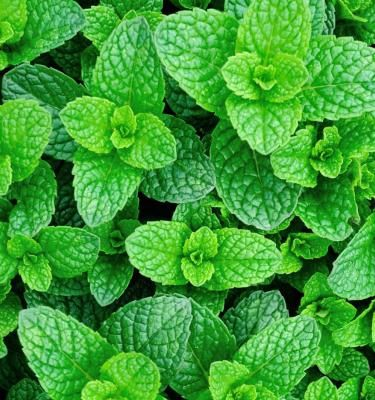


Processed Image (Grayscale & Resized):


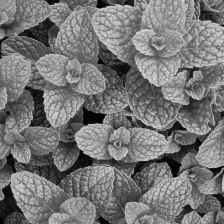

Original Image:


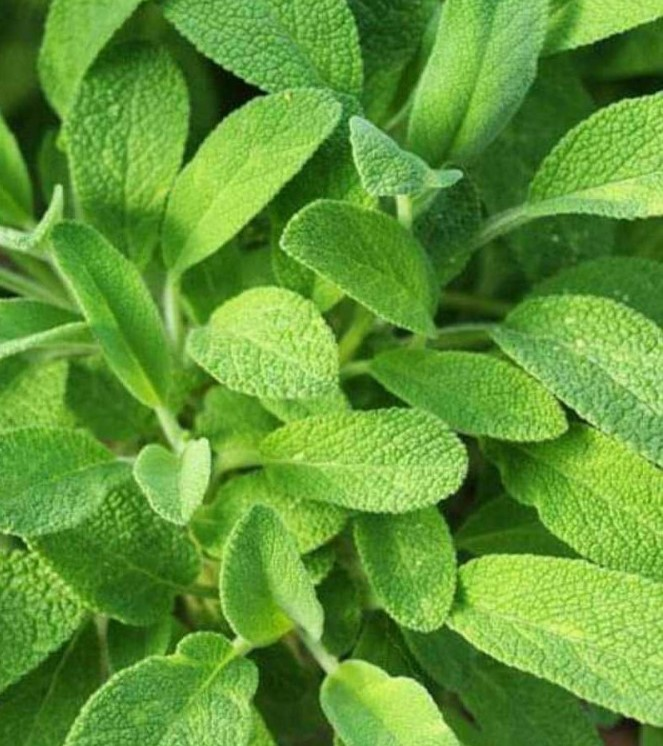


Processed Image (Grayscale & Resized):


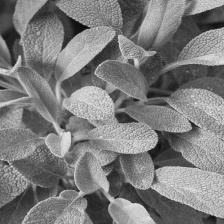

Original Image:


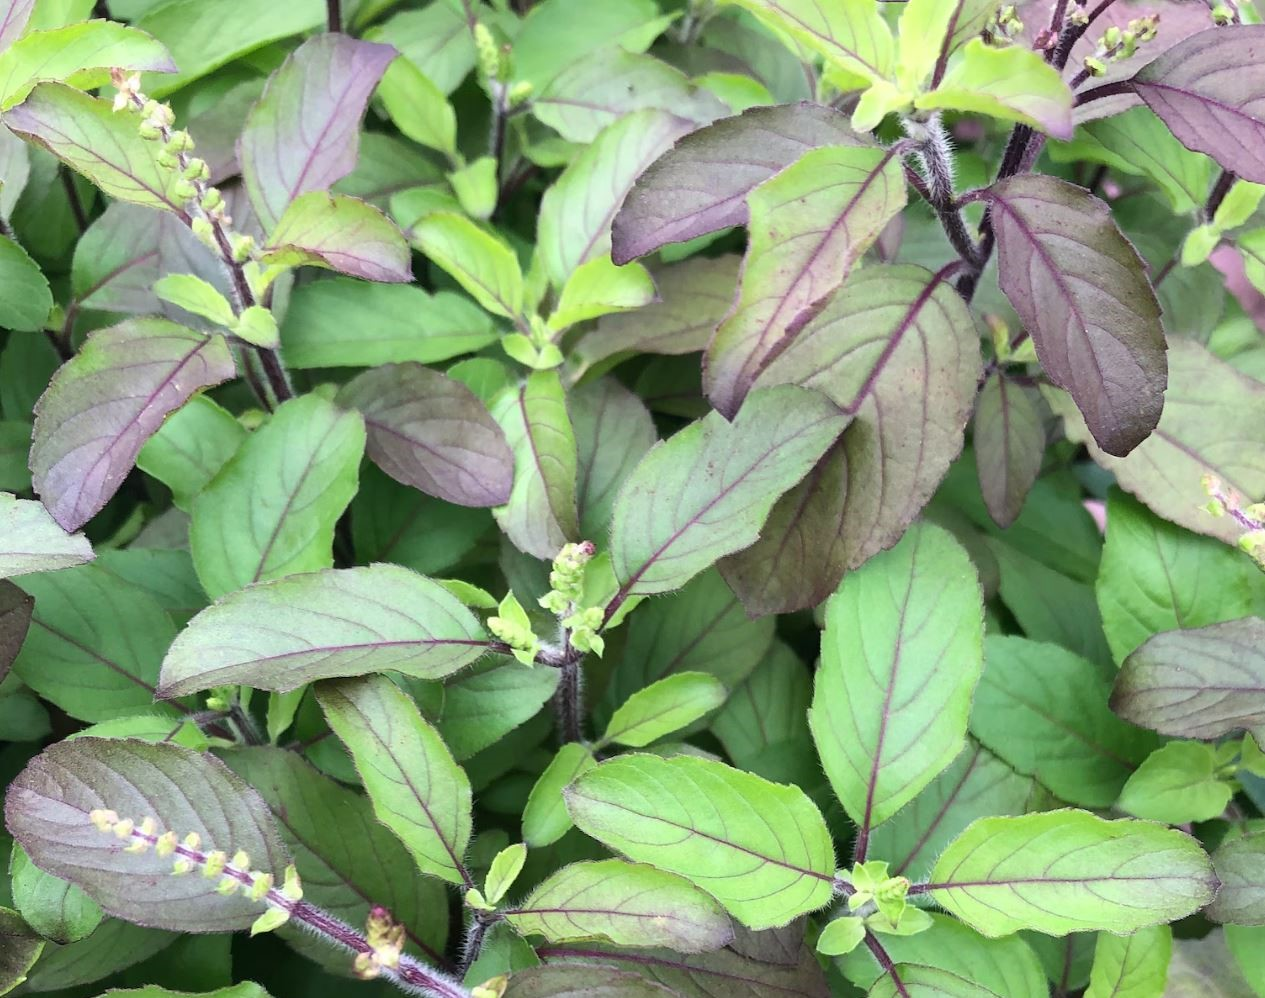


Processed Image (Grayscale & Resized):


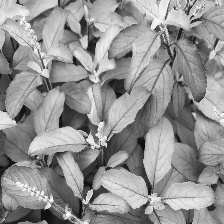

In [5]:
from IPython.display import Image # Importing the Image class for displaying images in Jupyter Notebook

def convert_and_resize(image_path, desired_size=(224, 224)):
    
    
    
  img = cv2.imread(image_path)       # Reading the image from the given path
  if img is None:
      print(f"Error: Could not read image from {image_path}")
      return     # Exiting the function if there was an error reading the image

  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # Converting the image to grayscale
  resized_img = cv2.resize(gray_img, desired_size)   # Resizing the grayscale image to the desired dimensions

  # Creating a new filename for the processed image (grayscale and resized)
  processed_path = image_path.replace('.jpg', '_processed.jpg')
  cv2.imwrite(processed_path, resized_img)

  # Displaying the original and processed images side-by-side
  print("Original Image:")
  display(Image(filename=image_path))    # Displaying the original image

  print("\nProcessed Image (Grayscale & Resized):")
  display(Image(filename=processed_path))


# Example usage with the image path
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

convert_and_resize(f'{image_folder}\image0.jpg')
convert_and_resize(f'{image_folder}\image1.jpg')
convert_and_resize(f'{image_folder}\image2.jpg')

## Task 4: Image Reading and Display
#### Checking bule,green and red channels of my herbs

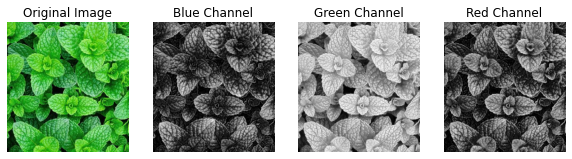

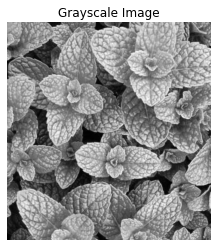

Dimensions of the grayscale image: (400, 375)


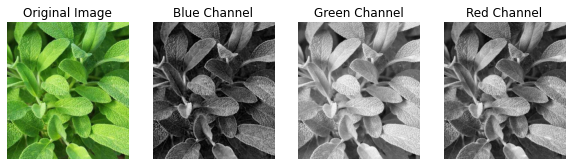

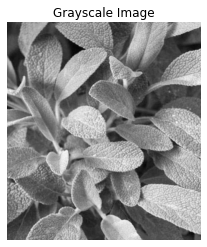

Dimensions of the grayscale image: (746, 663)


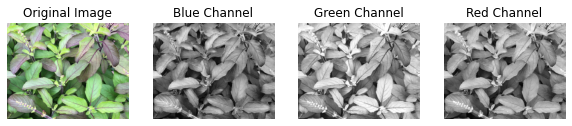

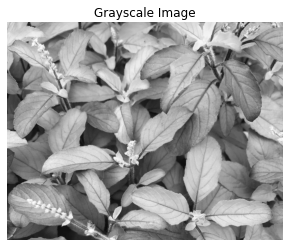

Dimensions of the grayscale image: (998, 1265)


In [1]:


# Function to read and display an image, its RGB channels, and its grayscale version
def display_image_and_channels(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Checking if image loading was successful
    if img is None:
        print(f"Error: Could not read the image from {image_path}")
        return

    # Displaying the original image
    plt.figure(figsize=(10, 5))   # Creating a new figure with the specified size
    plt.subplot(1, 4, 1)          # Creating a subplot (1 row, 4 columns, this is the 1st plot)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converting BGR to RGB for matplotlib
    plt.title('Original Image')   # Setting the title of the subplot
    plt.axis('off')               # Hiding the axis ticks and labels

    # Splitting the image into its BGR channels
    b, g, r = cv2.split(img)

    # Displaying the individual channels
    plt.subplot(1, 4, 2)
    plt.imshow(b, cmap='gray')
    plt.title('Blue Channel')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(g, cmap='gray')
    plt.title('Green Channel')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(r, cmap='gray')
    plt.title('Red Channel')
    plt.axis('off')

    plt.show()

    # Converting the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Displaying the grayscale image and print its dimensions
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()

    print(f"Dimensions of the grayscale image: {gray_img.shape}")

# Path to your image folder
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

# Processing each image
display_image_and_channels(f'{image_folder}\image0.jpg')
display_image_and_channels(f'{image_folder}\image1.jpg')
display_image_and_channels(f'{image_folder}\image2.jpg')

### Task 5: Image Resizing

Original Image:


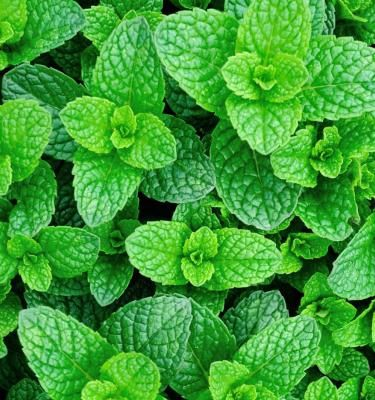


Resized Image:


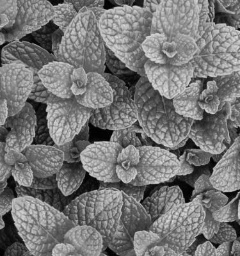

Dimensions of the resized image: (256, 240)
Original Image:


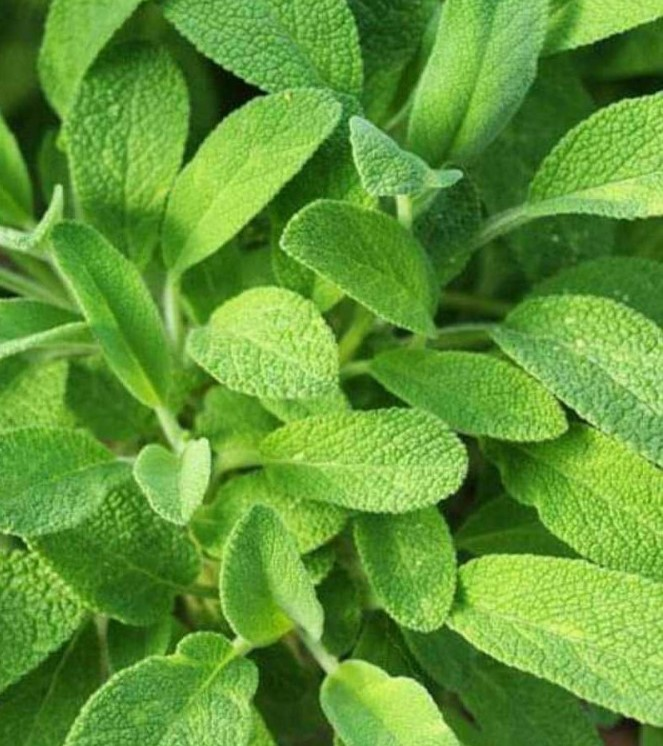


Resized Image:


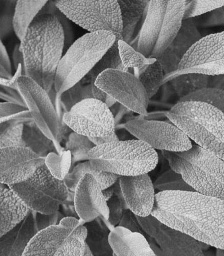

Dimensions of the resized image: (256, 224)
Original Image:


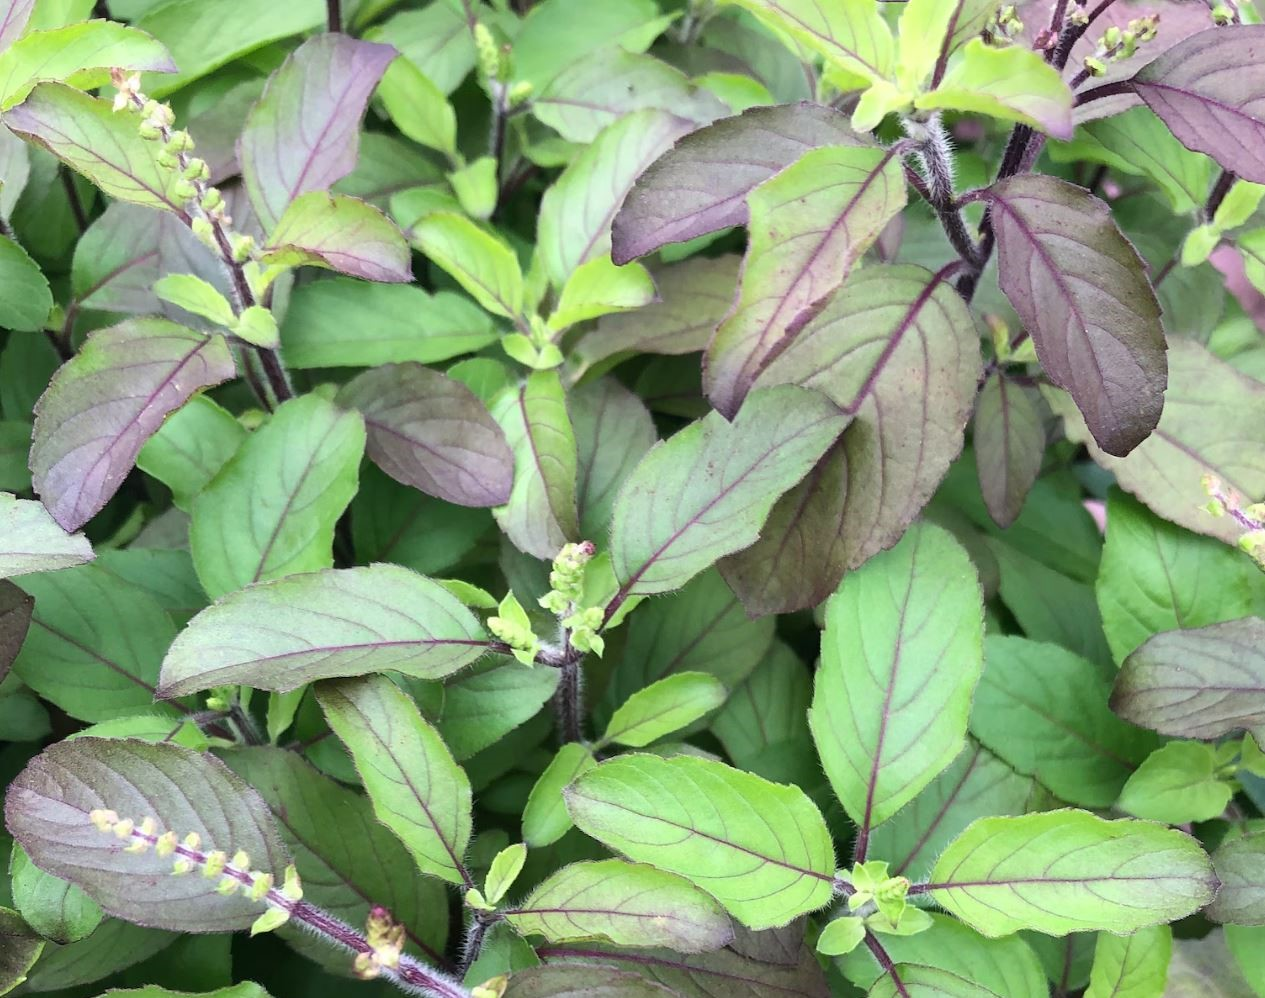


Resized Image:


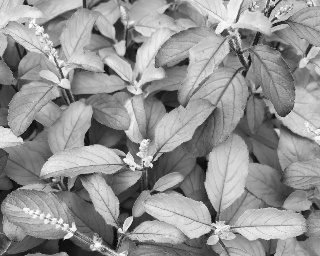

Dimensions of the resized image: (256, 320)


In [9]:


def resize_image_maintain_aspect_ratio(image_path, target_height=256):
    

    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 

    if img is None:
        print(f"Error: Could not read the image from {image_path}")
        return 

    # Calculating the new width to maintain aspect ratio and be divisible by 16
    original_height, original_width = img.shape[:2]
    aspect_ratio = original_width / original_height
    new_width = int(target_height * aspect_ratio)
    new_width = (new_width // 16) * 16 

    # Resizing the image
    resized_img = cv2.resize(img, (new_width, target_height))

    # Creating a new filename for the resized image
    resized_path = image_path.replace('.jpg', '_resized.jpg')
    cv2.imwrite(resized_path, resized_img)

    # Displaying the original and resized images side-by-side
    print("Original Image:")
    display(Image(filename=image_path))

    print("\nResized Image:")
    display(Image(filename=resized_path))

    # Printing the dimensions of the RESIZED image
    print(f"Dimensions of the resized image: {resized_img.shape}") 

    return resized_img

# Path to your image folder
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

# Resizing each image to a height of 256 pixels
resize_image_maintain_aspect_ratio(f'{image_folder}\image0.jpg'); 
resize_image_maintain_aspect_ratio(f'{image_folder}\image1.jpg'); 
resize_image_maintain_aspect_ratio(f'{image_folder}\image2.jpg'); 

### Task 6: Block-Feature Vector Generation


Feature vectors generated and saved to 'herb_feature_vectors.csv'


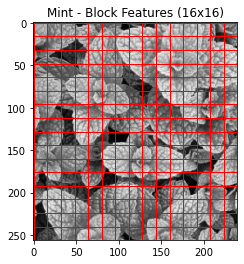

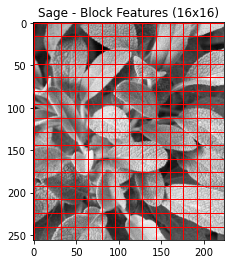

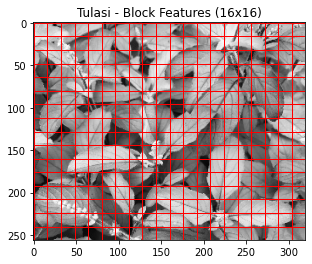

In [12]:

def generate_block_feature_vectors(image_path, label):
   
    # Reading the image in grayscale

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:    # Checking if image loading was successful
        print(f"Error: Could not read the image from {image_path}")
        return []   # Exiting the function if there was an error reading the image

    height, width = img.shape
    feature_vectors = []

    for i in range(0, height, 16):
        for j in range(0, width, 16):
            block = img[i:i+16, j:j+16]  # Extracting the 16x16 block

            # Handling blocks that are smaller than 16x16
            if block.shape != (16, 16):
                block = cv2.resize(block, (16, 16))  # Resize smaller blocks to 16x16

            # Flattening the block into a 256-dimensional vector
            feature_vector = block.flatten().tolist()

            # Adding the label to the feature vector
            feature_vector.append(label)

            feature_vectors.append(feature_vector)

    return feature_vectors

# Path to your image folder
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

# Generating feature vectors for each image
all_feature_vectors = []
all_feature_vectors.extend(generate_block_feature_vectors(f'{image_folder}\\image0_resized.jpg', 0))
all_feature_vectors.extend(generate_block_feature_vectors(f'{image_folder}\\image1_resized.jpg', 1))
all_feature_vectors.extend(generate_block_feature_vectors(f'{image_folder}\\image2_resized.jpg', 2))

# Creating a DataFrame from the feature vectors
column_names = [f'pixel_{i}' for i in range(256)] + ['label']
df = pd.DataFrame(all_feature_vectors, columns=column_names)

# Saving the DataFrame to a CSV file 
df.to_csv('herb_feature_vectors1.csv', index=False)

print("Feature vectors generated and saved to 'herb_feature_vectors.csv'")


def 

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Could not read the image from {image_path}")
        return

    height, width = img.shape

    # Creating a figure and axes
    fig, ax = plt.subplots(1)

    # Displaying the image
    ax.imshow(img, cmap='gray')

    # Adding rectangles to represent the blocks
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            rect = patches.Rectangle((j, i), block_size, block_size, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    # Setting the title, including the image name if provided
    title = f'Block Features ({block_size}x{block_size})'
    if image_name:
        title = f'{image_name} - {title}'
    plt.title(title)
    plt.show()


# Visualizing block features for each image, providing the image names
visualize_block_features(f'{image_folder}\\image0_resized.jpg', image_name='Mint')
visualize_block_features(f'{image_folder}\\image1_resized.jpg', image_name='Sage')
visualize_block_features(f'{image_folder}\\image2_resized.jpg', image_name='Tulasi')

### Task 7: Sliding Block-Feature Vector Generation


Sliding block feature vectors generated and saved to 'herb_sliding_block_feature_vectors.csv'


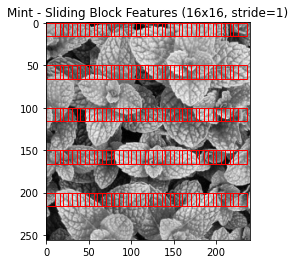

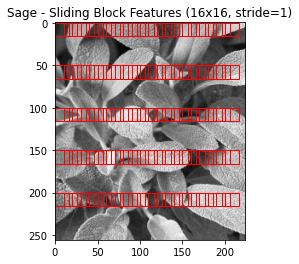

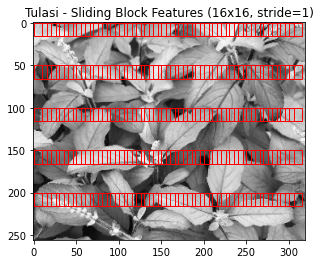

In [16]:

def generate_sliding_block_feature_vectors(image_path, label, block_size=16, stride=1):
    
    """
    Generating sliding block feature vectors from an image.
    
    Args:
        image_path (str): The path to the image file.
        label (int): The label assigned to the image (e.g., 0 for mint, 1 for sage, etc.).
        block_size (int): The size of each sliding block (default is 16x16 pixels).
        stride (int): The step size for sliding the block (default is 1 pixel).
    
    Returns:
        list: A list of feature vectors where each vector represents a flattened block and its label.
    """
    
    # Reading the image in grayscale

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # If the image cannot be read, printing an error message and return an empty list

    if img is None:
        print(f"Error: Could not read the image from {image_path}")
        return []

    # Geting the dimensions of the image (height, width)

    height, width = img.shape
    feature_vectors = []
    
    # Looping over the image using the sliding window technique


    for i in range(0, height - block_size + 1, stride):
        for j in range(0, width - block_size + 1, stride):
            
            # Extracting the current block of size (block_size x block_size)
            block = img[i:i+block_size, j:j+block_size] 
            
            # Flattening the block into a feature vector and append the label at the end
            feature_vector = block.flatten().tolist()
            feature_vector.append(label)
            
            # Adding the feature vector to the list
            feature_vectors.append(feature_vector)
            
            
    # Return the list of feature vectors
    return feature_vectors


def visualize_sliding_block_features(image_path, block_size=16, stride=1, image_name=None):
   """
    Visualizes the sliding block features by drawing rectangles on the image.
    
    Args:
        image_path (str): The path to the image file.
        block_size (int): The size of each sliding block (default is 16x16).
        stride (int): The step size for sliding the block (default is 1).
        image_name (str): Optional; the name of the image for displaying in the plot title.
    """


    # Read the image in grayscale

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # If the image cannot be read, print an error message and exit the function
    if img is None:
        print(f"Error: Could not read the image from {image_path}")
        return
    
    # Getting the dimensions of the image (height, width)
    height, width = img.shape

    # Creating a figure and axes
    fig, ax = plt.subplots(1)

    # Displaying the grayscale image
    ax.imshow(img, cmap='gray')

    # Adding rectangles to represent some of the sliding blocks 
    for i in range(0, height - block_size + 1, stride*50):  # Increased stride for visualization
        for j in range(0, width - block_size + 1, stride*10): 
            rect = patches.Rectangle((j, i), block_size, block_size, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    # Setting the title of the plot, including the provided image name
    title = f'Sliding Block Features ({block_size}x{block_size}, stride={stride})'
    if image_name:
        title = f'{image_name} - {title}'
    plt.title(title)
    plt.show()


    
    
# Path to your image folder
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

# Generating feature vectors for each image
all_feature_vectors = []
all_feature_vectors.extend(generate_sliding_block_feature_vectors(f'{image_folder}\\image0_resized.jpg', 0))
all_feature_vectors.extend(generate_sliding_block_feature_vectors(f'{image_folder}\\image1_resized.jpg', 1))
all_feature_vectors.extend(generate_sliding_block_feature_vectors(f'{image_folder}\\image2_resized.jpg', 2))

# Creating a DataFrame from the feature vectors
column_names = [f'pixel_{i}' for i in range(256)] + ['label']
df = pd.DataFrame(all_feature_vectors, columns=column_names)

# Saved the DataFrame to a CSV file 
df.to_csv('herb_sliding_block_feature_vectors1.csv', index=False)

print("Sliding block feature vectors generated and saved to 'herb_sliding_block_feature_vectors.csv'")    
    

# Visualizing sliding block features for each image with provided image names
visualize_sliding_block_features(f'{image_folder}\\image0_resized.jpg', image_name='Mint')
visualize_sliding_block_features(f'{image_folder}\\image1_resized.jpg', image_name='Sage')
visualize_sliding_block_features(f'{image_folder}\\image2_resized.jpg', image_name='Tulasi')

### Task 8: Statistical Descriptors and Data Analysis



--- Non-Overlapping Block Features ---
          pixel_0     pixel_1     pixel_2     pixel_3     pixel_4     pixel_5  \
count  784.000000  784.000000  784.000000  784.000000  784.000000  784.000000   
mean   131.978316  131.247449  131.371173  130.812500  130.420918  129.909439   
std     51.221411   51.689341   50.360045   51.246424   50.429080   51.246488   
min      3.000000    3.000000    2.000000    6.000000    5.000000    7.000000   
25%     93.750000   89.750000   92.750000   93.000000   93.000000   90.000000   
50%    135.500000  135.000000  132.000000  133.000000  135.000000  133.000000   
75%    173.000000  172.000000  173.000000  172.000000  169.000000  170.000000   
max    249.000000  245.000000  240.000000  247.000000  246.000000  244.000000   

          pixel_6     pixel_7     pixel_8     pixel_9  ...   pixel_247  \
count  784.000000  784.000000  784.000000  784.000000  ...  784.000000   
mean   130.460459  129.397959  129.155612  128.202806  ...  127.950255   
std     

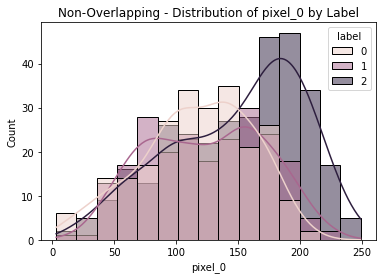

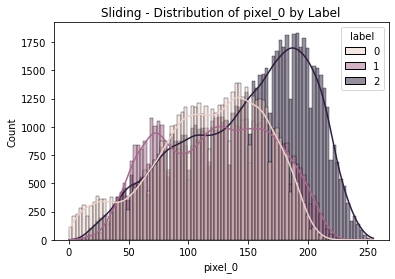

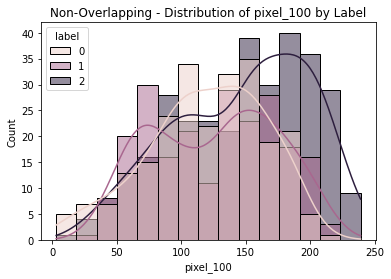

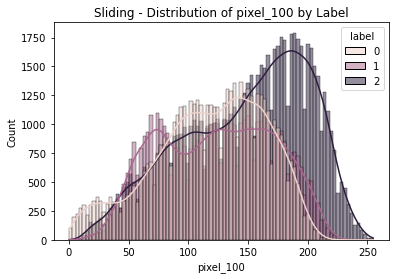

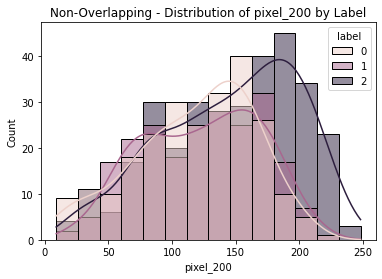

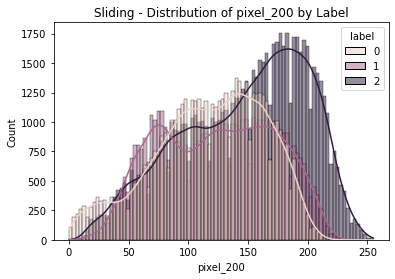

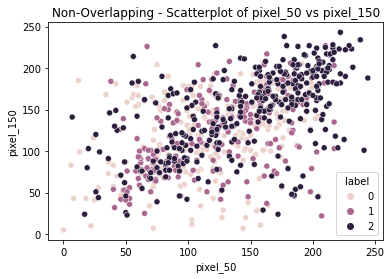

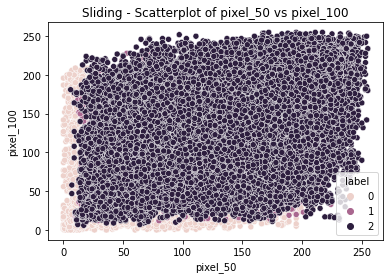

In [5]:

import seaborn as sns

# Loading the datasets from CSV files
df_non_overlapping = pd.read_csv('herb_feature_vectors1.csv')
df_sliding = pd.read_csv('herb_sliding_block_feature_vectors1.csv')

# Displaying the basic statistical information for the non-overlapping block features
print("\n--- Non-Overlapping Block Features ---")
print(df_non_overlapping.describe())   # Summary statistics (mean, std, min, max, etc.)
print("\nClass distribution:")
print(df_non_overlapping['label'].value_counts())  # Count of samples per class (label)


# Displaying the basic statistical information for the sliding block features

print("\n--- Sliding Block Features ---")
print(df_sliding.describe())  # Summary statistics for the sliding block features
print("\nClass distribution:")
print(df_sliding['label'].value_counts())   # Counting of samples per class (label)

# Visualizations
# Histograms for a few pixel features 

# Looping over a few selected pixel features (pixel_0, pixel_100, pixel_200)

for feature in ['pixel_0', 'pixel_100', 'pixel_200']:
    # Ploting histogram for the non-overlapping block dataset
    plt.figure()
    sns.histplot(data=df_non_overlapping, x=feature, hue='label', kde=True)
    plt.title(f'Non-Overlapping - Distribution of {feature} by Label')
    plt.show()
    
    
    # Plotting histogram for the sliding block dataset


    plt.figure()
    sns.histplot(data=df_sliding, x=feature, hue='label', kde=True)
    plt.title(f'Sliding - Distribution of {feature} by Label')
    plt.show()

# Scatter plot for two pixel features in the non-overlapping block dataset
sns.scatterplot(data=df_non_overlapping, x='pixel_50', y='pixel_150', hue='label')
plt.title('Non-Overlapping - Scatterplot of pixel_50 vs pixel_150')
plt.show()

# Scatter plot for two pixel features in the sliding block dataset
sns.scatterplot(data=df_sliding, x='pixel_50', y='pixel_100', hue='label')
plt.title('Sliding - Scatterplot of pixel_50 vs pixel_100')
plt.show()

### Task 8: In-depth Data Analysis and Characteristics


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardizing the features (excluding the 'label' column) using StandardScaler
scaler = StandardScaler()
df_non_overlapping_std = scaler.fit_transform(df_non_overlapping.drop('label', axis=1))
df_sliding_std = scaler.fit_transform(df_sliding.drop('label', axis=1))

# Converting the standardized NumPy arrays back into DataFrames for easier handling
df_non_overlapping_std = pd.DataFrame(df_non_overlapping_std, columns=df_non_overlapping.drop('label', axis=1).columns)
df_sliding_std = pd.DataFrame(df_sliding_std, columns=df_sliding.drop('label', axis=1).columns)

# Now you can use .head() 
# Displaying the first few rows of the standardized non-overlapping dataset for inspection
print(df_non_overlapping_std.head())

# Normalizing the features (excluding the 'label' column) using MinMaxScaler
scaler = MinMaxScaler()
df_non_overlapping_norm = scaler.fit_transform(df_non_overlapping.drop('label', axis=1))
df_sliding_norm = scaler.fit_transform(df_sliding.drop('label', axis=1))

# Converting the normalized NumPy arrays back into DataFrames for easier handling
df_non_overlapping_norm = pd.DataFrame(df_non_overlapping_norm, columns=df_non_overlapping.drop('label', axis=1).columns)
df_sliding_norm = pd.DataFrame(df_sliding_norm, columns=df_sliding.drop('label', axis=1).columns)

# Displaying summary statistics of the normalized sliding dataset (e.g., min, max, mean, etc.)
print(df_sliding_norm.describe())

    pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
0  0.019959  0.169438  0.390019  0.374655  0.368655  0.489918  0.089582   
1  0.352063 -0.643627 -0.623335 -0.582119 -0.345674  0.021294  0.188250   
2  0.352063 -0.082225  0.350279  0.003661  0.110703  0.489918  0.227717   
3 -1.777311 -2.153606 -2.332129 -2.319934 -2.290238 -2.302298 -2.238991   
4 -0.429358 -0.837214 -0.961120 -0.543067 -1.060004 -0.857375 -0.758966   

    pixel_7   pixel_8   pixel_9  ...  pixel_246  pixel_247  pixel_248  \
0 -0.086633  0.133516  0.384886  ...   0.607021  -0.274552  -0.321087   
1  0.267938 -0.490718 -0.217798  ...  -0.250816  -0.609126  -0.758122   
2 -0.342712 -0.198109 -0.120591  ...  -0.133838   0.020660   0.175544   
3 -2.351948 -2.324404 -2.103616  ...   1.055436   1.024380   0.890692   
4 -1.189743 -0.588255 -0.820483  ...  -0.582253  -0.668168  -0.559470   

   pixel_249  pixel_250  pixel_251  pixel_252  pixel_253  pixel_254  pixel_255  
0  -0.269819   0.249731   0.4

### Task 9: Feature Space Construction


In [6]:


# Loading the CSV files generated in Task 7 for images 0, 1, and 2
# Filtering the rows by 'label' to create separate DataFrames for each image

df_image0 = pd.read_csv('herb_sliding_block_feature_vectors1.csv')[pd.read_csv('herb_sliding_block_feature_vectors1.csv')['label'] == 0]
df_image1 = pd.read_csv('herb_sliding_block_feature_vectors1.csv')[pd.read_csv('herb_sliding_block_feature_vectors1.csv')['label'] == 1]
df_image2 = pd.read_csv('herb_sliding_block_feature_vectors1.csv')[pd.read_csv('herb_sliding_block_feature_vectors1.csv')['label'] == 2]


# Merging the data for image0 and image1
df_image01 = pd.concat([df_image0, df_image1])

# Shuffiling the rows of the merged DataFrame to randomize the order of samples
df_image01 = df_image01.sample(frac=1).reset_index(drop=True)

# Saving the randomized feature space for image0 and image1 to a new CSV file
df_image01.to_csv('image01.csv', index=False)

# Merging the data for image0, image1, and image2
df_image012 = pd.concat([df_image0, df_image1, df_image2])

# Shuffiling the rows of the merged DataFrame to randomize the order of samples
df_image012 = df_image012.sample(frac=1).reset_index(drop=True)

# Saving the randomized feature space for image0, image1, and image2 to a new CSV file
df_image012.to_csv('image012.csv', index=False)


# Printing a message to confirm that the feature spaces have been created and saved

print("Feature spaces 'image01.csv' and 'image012.csv' created and randomized.")

Feature spaces 'image01.csv' and 'image012.csv' created and randomized.


Purpose of Randomization

Prevent Order Bias: Randomizing the order of the feature vectors helps prevent machine learning models from learning any patterns or biases that might be accidentally introduced due to the original order of the data.
Improved Generalization: Shuffling the data ensures that the model sees a variety of samples from different classes during training, which can lead to better generalization to unseen data.
In summary, the code effectively randomizes the placement (rows) of the feature vectors in the 'image01.csv' and 'image012.csv' files, as required by Task 9. This is a crucial step in preparing the data for machine learning tasks.

### Task 10: Feature Space Visualization and Separability Analysis


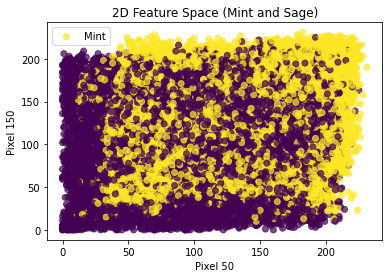

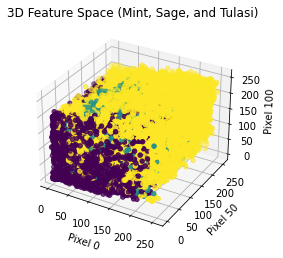

In [26]:

from mpl_toolkits.mplot3d import Axes3D   # Importing the 3D plotting module

# Loading the CSV files containing the merged and shuffled feature spaces for two and three classes
df_image01 = pd.read_csv('image01.csv')   # Data for Mint and Sage
df_image012 = pd.read_csv('image012.csv')   # Data for Mint, Sage, and Tulasi

# 2D Feature Space visualization for two classes (Mint and Sage)
plt.figure()   # Creating a new figure for the 2D plot
# Scatter plot of pixel_50 vs pixel_150, color-coded by 'label'
plt.scatter(df_image01['pixel_50'], df_image01['pixel_150'], c=df_image01['label'], cmap='viridis', alpha=0.7)
plt.xlabel('Pixel 50')   # Labelling for the x-axis
plt.ylabel('Pixel 150')  # Labelling for the y-axis
plt.title('2D Feature Space (Mint and Sage)')   # Setting the title of the plot
plt.legend(['Mint', 'Sage'])
plt.show()  # Displaying the 2D plot

# 3D Feature Space visualization for three classes (Mint, Sage, and Tulasi)
fig = plt.figure()   # Creating a new figure for the 3D plot
# 3D scatter plot with pixel_0, pixel_50, and pixel_100
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_image012['pixel_0'], df_image012['pixel_50'], df_image012['pixel_100'], c=df_image012['label'], cmap='viridis')
ax.set_xlabel('Pixel 0')  # Label for the x-axis in 3D space
ax.set_ylabel('Pixel 50')  # Label for the y-axis in 3D space
ax.set_zlabel('Pixel 100')  # Label for the z-axis in 3D space
plt.title('3D Feature Space (Mint, Sage, and Tulasi)')  # Set the title of the 3D plot
plt.show()    plt.show()  # Display the 3D plot


## Checking for few more pixel values to find the differentation
### 2D: 'pixel_10' and 'pixel_200'
### 3D: 'pixel_5', 'pixel_120', and 'pixel_230'

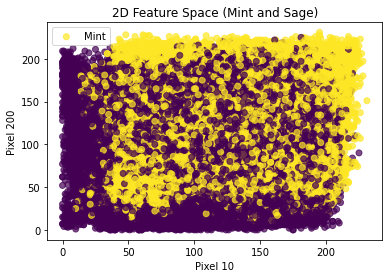

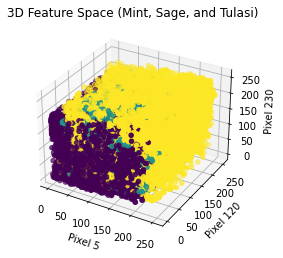

In [27]:
# 2D Feature Space (Two Classes: Mint and Sage)
plt.figure()
plt.scatter(df_image01['pixel_10'], df_image01['pixel_200'], c=df_image01['label'], cmap='viridis', alpha=0.7)
plt.xlabel('Pixel 10')
plt.ylabel('Pixel 200')
plt.title('2D Feature Space (Mint and Sage)')
plt.legend(['Mint', 'Sage'])
plt.show()

# 3D Feature Space (Three Classes: Mint, Sage, and Tulasi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_image012['pixel_5'], df_image012['pixel_120'], df_image012['pixel_230'], c=df_image012['label'], cmap='viridis')
ax.set_xlabel('Pixel 5')
ax.set_ylabel('Pixel 120')
ax.set_zlabel('Pixel 230')
plt.title('3D Feature Space (Mint, Sage, and Tulasi)')
plt.show()

#### 2D Plot for different features

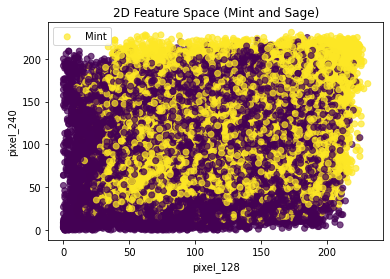

In [28]:

def plot_2d_feature_space(df, pixel_128, pixel_240, title):
    plt.figure()
    plt.scatter(df[pixel_128], df[pixel_240], c=df['label'], cmap='viridis', alpha=0.7)
    plt.xlabel(pixel_128)
    plt.ylabel(pixel_240)
    plt.title(title)
    plt.legend(['Mint', 'Sage'])
    plt.show()

# Example usage (replace feature1 and feature2 with your chosen features)
plot_2d_feature_space(df_image01, 'pixel_128', 'pixel_240', '2D Feature Space (Mint and Sage)')

#### 2D Plot for different features

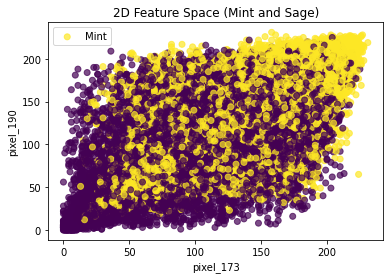

In [31]:


def plot_2d_feature_space(df, pixel_173, pixel_190, title):
    plt.figure()
    plt.scatter(df[pixel_173], df[pixel_190], c=df['label'], cmap='viridis', alpha=0.7)
    plt.xlabel(pixel_173)
    plt.ylabel(pixel_190)
    plt.title(title)
    plt.legend(['Mint', 'Sage'])
    plt.show()

# Example usage (replace feature1 and feature2 with your chosen features)
plot_2d_feature_space(df_image01, 'pixel_173', 'pixel_190', '2D Feature Space (Mint and Sage)')

#### 2D Plot for different features

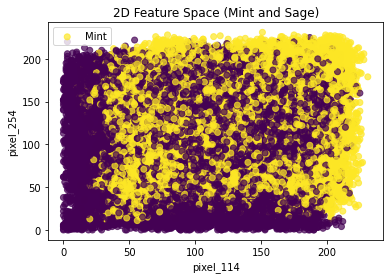

In [32]:


def plot_2d_feature_space(df, pixel_114, pixel_254, title):
    plt.figure()
    plt.scatter(df[pixel_114], df[pixel_254], c=df['label'], cmap='viridis', alpha=0.7)
    plt.xlabel(pixel_114)
    plt.ylabel(pixel_254)
    plt.title(title)
    plt.legend(['Mint', 'Sage'])
    plt.show()

# Example usage (replace feature1 and feature2 with your chosen features)
plot_2d_feature_space(df_image01, 'pixel_114', 'pixel_254', '2D Feature Space (Mint and Sage)')

### 3D plot for different features

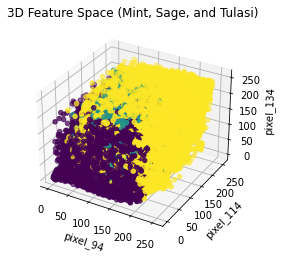

In [34]:

from mpl_toolkits.mplot3d import Axes3D

def plot_3d_feature_space(df, pixel_94, pixel_114, pixel_134, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[pixel_94], df[pixel_114], df[pixel_134], c=df['label'], cmap='viridis')
    ax.set_xlabel(pixel_94)
    ax.set_ylabel(pixel_114)
    ax.set_zlabel(pixel_134)
    plt.title(title)
    plt.show()

# Example usage (replace feature1, feature2, and feature3)
plot_3d_feature_space(df_image012, 'pixel_94', 'pixel_114', 'pixel_134', '3D Feature Space (Mint, Sage, and Tulasi)')

### Task 10: Feature Space Visualization and Separability Analysis
Discussion of the Figures

2D Feature Space (Mint and Sage)

Observations:

The plot shows two clusters of points representing Mint (yellow) and Sage (purple).
There is a significant overlap between the two clusters, suggesting that the selected features (pixel_173 and pixel_190) are not entirely effective in separating these two herbs.
While there's a slight tendency for Mint to be concentrated towards the top-left and Sage towards the bottom-right, the distinction is not clear-cut.
Separable Features:

The current 2D feature space indicates that pixel_173 and pixel_190 alone might not be sufficient for a reliable classification model to distinguish between Mint and Sage.
Exploring additional feature combinations or dimensionality reduction techniques may lead to improved class separation."
3D Feature Space (Mint, Sage, and Tulasi)

Observations:

The 3D plot shows three clusters representing the three herb classes (Mint in yellow, Sage in purple, and Tulasi in a third color, likely blue or green depending on your colormap).
Similar to the 2D plot, there's a considerable degree of overlap between the clusters, particularly between Mint and Sage.
While some separation is visible, it's not distinct enough for confident classification based on these three features alone.
Separable Features

The 3D visualization suggests that the combination of pixel_5, pixel_120, and pixel_250 provides some level of discrimination between the three herb classes, but it's not optimal.
Further exploration of feature combinations or dimensionality reduction techniques is necessary to find a representation that maximizes class separation.
Overall Insights

The current feature combinations provide some, but not complete, separability between the herb classes.
This indicates that the raw pixel values alone may not be sufficient for effective classification.
It highlights the need for further feature engineering, dimensionality reduction, or potentially more sophisticated machine learning models to achieve better classification accuracy.

### Task 11: Generalizing Image Processing and Feature Space Generation


#### Note: Due to storage issue on my personal PC i have completed the rest of the tasks on Google colab


In [ ]:
def generate_block_feature_vectors(image_path, label, block_size=16):
    """
    Generates feature vectors by dividing an image into non-overlapping blocks of a given size.
    Each block is flattened into a vector and associated with a label.
    Args:
        image_path (str): Path to the input image.
        label (int): Class label for the image.
        block_size (int): Size of each block. Default is 16x16.
    Returns:
        List: A list of feature vectors, where each vector represents a block.
    """
    
    # Loading image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    if img is None:
        print(f"Error: Could not read the image from {image_path}")
        return []

    height, width = img.shape  # Getting the image dimensions
    feature_vectors = []

    # Looping through the image in non-overlapping block_size steps
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = img[i:i + block_size, j:j + block_size]  # Extracting block of size block_size x block_size
            if block.shape != (block_size, block_size):  # Handling boundary conditions by resizing if needed
                block = cv2.resize(block, (block_size, block_size))
            feature_vector = block.flatten().tolist()  # Flattening the block into a vector
            feature_vector.append(label)  # Appending the class label to the feature vector
            feature_vectors.append(feature_vector)

    return feature_vectors  # Returns all feature vectors for the image

def generate_sliding_block_feature_vectors(image_path, label, block_size=16, stride=1):
    
    """
    Generates feature vectors using sliding windows. Blocks slide over the image with a given stride.
    Args:
        image_path (str): Path to the input image.
        label (int): Class label for the image.
        block_size (int): Size of each block. Default is 16x16.
        stride (int): Stride value for sliding windows. Default is 1.
    Returns:
        List: A list of sliding block feature vectors.
    """
    
    # Loading image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    if img is None:
        print(f"Error: Could not read the image from {image_path}")
        return []

    height, width = img.shape
    feature_vectors = []

    # Slide over the image in stride steps
    for i in range(0, height - block_size + 1, stride):
        for j in range(0, width - block_size + 1, stride):
            block = img[i:i + block_size, j:j + block_size]  # Extracting block of size block_size x block_size
            feature_vector = block.flatten().tolist()  # Flattening the block into a vector
            feature_vector.append(label)  # Appending the class label to the feature vector
            feature_vectors.append(feature_vector)

    return feature_vectors

def visualize_block_features(image_path, block_size=16, image_name=None):
    
    """
    Visualizes non-overlapping block features by drawing a grid on the image.
    Args:
        image_path (str): Path to the input image.
        block_size (int): Size of each block. Default is 16x16.
        image_name (str): Optional. Name to save the image with visualized blocks.
    """
    
     # Loading image in grayscale

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
    if img is None:
        print(f"Error: Could not read the image from {image_path}")
        return None

    height, width = img.shape

    fig, ax = plt.subplots(1)
    ax.imshow(img, cmap='gray')

    # Drawing grid on the image
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            rect = patches.Rectangle((j, i), block_size, block_size, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    title = f'Block Features ({block_size}x{block_size})'
    if image_name:
        title = f'{image_name} - {title}'
    plt.title(title)

    output_filename = f'{image_name}_block_features.png' if image_name else 'block_features.png'
    plt.savefig(output_filename)  # Saving the visualized image
    plt.close(fig)

    return output_filename

def visualize_sliding_block_features(image_path, block_size=16, stride=1, image_name=None):
    
    """
    Visualizes sliding block features by drawing sliding windows on the image.
    Args:
        image_path (str): Path to the input image.
        block_size (int): Size of each block. Default is 16x16.
        stride (int): Stride value for sliding windows. Default is 1.
        image_name (str): Optional. Name to save the image with visualized sliding blocks.
    """
    
    # Loading image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  
    if img is None:
        print(f"Error: Could not read the image from {image_path}")
        return None

    height, width = img.shape

    fig, ax = plt.subplots(1)
    ax.imshow(img, cmap='gray')

    # Drawing grid for sliding blocks (visualized at every 5th step for readability)
    for i in range(0, height - block_size + 1, stride * 5):
        for j in range(0, width - block_size + 1, stride * 5):
            rect = patches.Rectangle((j, i), block_size, block_size, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    title = f'Sliding Block Features ({block_size}x{block_size}, stride={stride})'
    if image_name:
        title = f'{image_name} - {title}'
    plt.title(title)

    output_filename = f'{image_name}_sliding_block_features.png' if image_name else 'sliding_block_features.png'
    plt.savefig(output_filename)  # Saving the visualized image
    plt.close(fig)

    return output_filename

def process_images_in_folder(folder_path, block_size=16, stride=1, output_csv='feature_vectors.csv', feature_type='non-overlapping'):
    
    """
    Processes all images in a folder, generates feature vectors, and visualizes the blocks.
    Args:
        folder_path (str): Path to the folder containing images.
        block_size (int): Size of each block. Default is 16x16.
        stride (int): Stride value for sliding windows. Default is 1.
        output_csv (str): Path to save the CSV file with feature vectors.
        feature_type (str): Type of feature extraction ('non-overlapping' or 'sliding').
    """
    
    all_feature_vectors = []

    # Looping through the images in the folder
    for i, filename in enumerate(os.listdir(folder_path)):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            label = i  # Using the index as the label

            # Generating feature vectors based on the specified feature type
            if feature_type == 'non-overlapping':
                feature_vectors = generate_block_feature_vectors(image_path, label, block_size)
                visualize_block_features(image_path, block_size, image_name=filename[:-4])  # Removing file extension for the image name
            elif feature_type == 'sliding':
                feature_vectors = generate_sliding_block_feature_vectors(image_path, label, block_size, stride)
                visualize_sliding_block_features(image_path, block_size, stride, image_name=filename[:-4])
            else:
                print(f"Error: Invalid feature type '{feature_type}'. Choose 'non-overlapping' or 'sliding'.")
                return

            all_feature_vectors.extend(feature_vectors)  # Appending the feature vectors to the list

    # Saving the feature vectors to a CSV file
    column_names = [f'pixel_{i}' for i in range(block_size * block_size)] + ['label']
    df = pd.DataFrame(all_feature_vectors, columns=column_names)
    df.to_csv(output_csv, index=False)

    print(f"{feature_type.capitalize()} block feature vectors generated and saved to '{output_csv}'")

# Example usage:
# Path to the folder containing images
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1\N_number of images'

# Generate non-overlapping block features and visualize
process_images_in_folder(image_folder, stride=16, output_csv='herb_non_overlapping_feature_vectors.csv', feature_type='non-overlapping')

# Generate sliding block features and visualize
process_images_in_folder(image_folder, stride=1, output_csv='herb_sliding_block_feature_vectors.csv', feature_type='sliding')


Non-overlapping block feature vectors generated and saved to 'herb_non_overlapping_feature_vectors.csv'


# Assignment 2

### Task 1: Completing and Extending Assignment 1


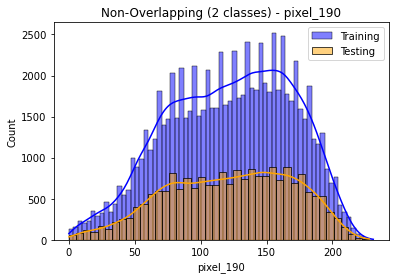

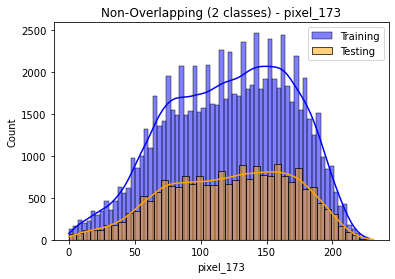

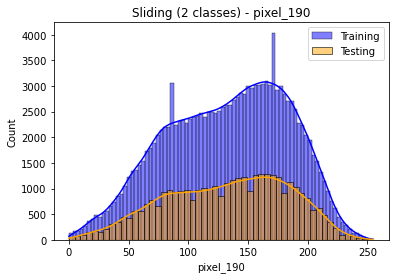

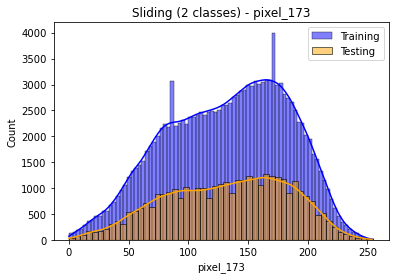

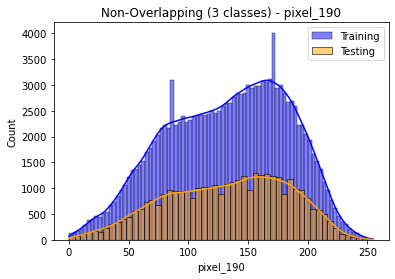

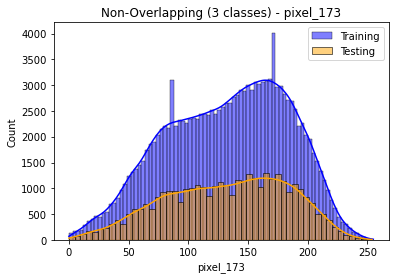

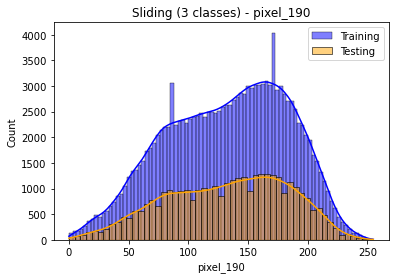

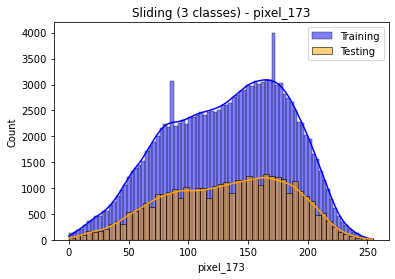

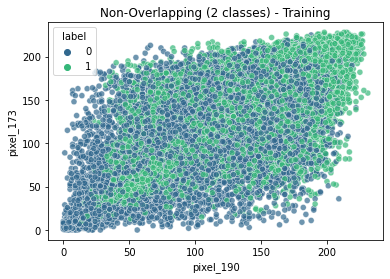

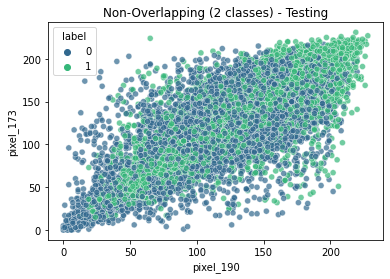

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


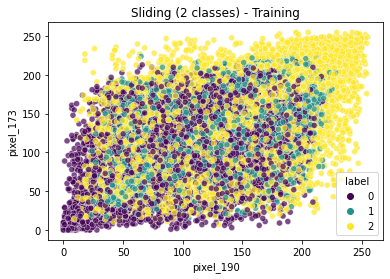

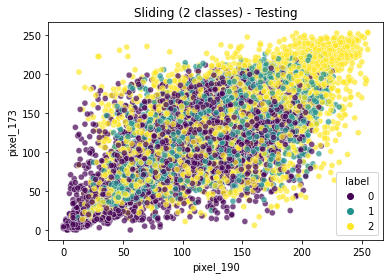

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


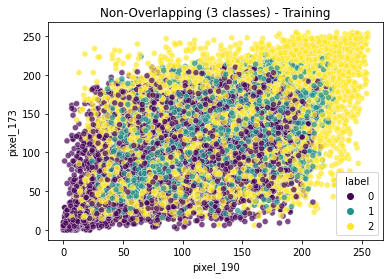

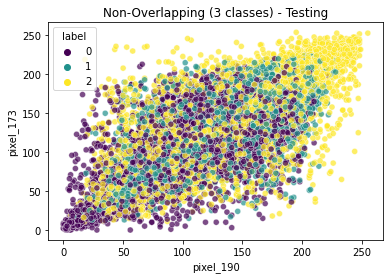

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


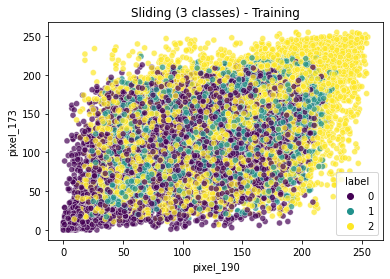

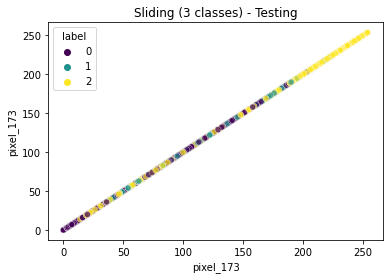

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the datasets ---
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

df_non_overlapping_2 = pd.read_csv(f'{image_folder}\image01.csv')  # Non-overlapping, 2 classes
df_sliding_2 = pd.read_csv(f'{image_folder}\herb_sliding_block_feature_vectors1.csv')  # Sliding, 2 classes
df_non_overlapping_3 = pd.read_csv(f'{image_folder}\image012.csv')  # Non-overlapping, 3 classes
df_sliding_3 = pd.read_csv(f'{image_folder}\herb_sliding_block_feature_vectors1.csv')  # Sliding, 3 classes

# --- Divide the data domain into 80:20 (training:testing) ---
from sklearn.model_selection import train_test_split

# Function to split a DataFrame into training and testing sets
def split_data(df):
    X = df.drop('label', axis=1)  # Features
    y = df['label']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80:20 split, random_state for reproducibility
    return X_train, X_test, y_train, y_test

# Split each DataFrame
X_train_non_overlap_2, X_test_non_overlap_2, y_train_non_overlap_2, y_test_non_overlap_2 = split_data(df_non_overlapping_2)
X_train_sliding_2, X_test_sliding_2, y_train_sliding_2, y_test_sliding_2 = split_data(df_sliding_2)
X_train_non_overlap_3, X_test_non_overlap_3, y_train_non_overlap_3, y_test_non_overlap_3 = split_data(df_non_overlapping_3)
X_train_sliding_3, X_test_sliding_3, y_train_sliding_3, y_test_sliding_3 = split_data(df_sliding_3)

# --- Select two features and plot histograms ---
feature1 = 'pixel_190'  # Example feature 1
feature2 = 'pixel_173'  # Example feature 2

# Function to plot histograms for training and testing sets
def plot_histograms(X_train, X_test, feature, title):
    plt.figure()
    sns.histplot(X_train[feature], color='blue', label='Training', kde=True)
    sns.histplot(X_test[feature], color='orange', label='Testing', kde=True)
    plt.title(title)
    plt.legend()
    plt.show()

# Plot histograms for each category
plot_histograms(X_train_non_overlap_2, X_test_non_overlap_2, feature1, f'Non-Overlapping (2 classes) - {feature1}')
plot_histograms(X_train_non_overlap_2, X_test_non_overlap_2, feature2, f'Non-Overlapping (2 classes) - {feature2}')
plot_histograms(X_train_sliding_2, X_test_sliding_2, feature1, f'Sliding (2 classes) - {feature1}')
plot_histograms(X_train_sliding_2, X_test_sliding_2, feature2, f'Sliding (2 classes) - {feature2}')
plot_histograms(X_train_non_overlap_3, X_test_non_overlap_3, feature1, f'Non-Overlapping (3 classes) - {feature1}')
plot_histograms(X_train_non_overlap_3, X_test_non_overlap_3, feature2, f'Non-Overlapping (3 classes) - {feature2}')
plot_histograms(X_train_sliding_3, X_test_sliding_3, feature1, f'Sliding (3 classes) - {feature1}')
plot_histograms(X_train_sliding_3, X_test_sliding_3, feature2, f'Sliding (3 classes) - {feature2}')

# --- Generate scatter plots ---

# Function to plot scatter plots for training and testing sets
def plot_scatter(X, y, feature1, feature2, title):
    plt.figure()
    sns.scatterplot(x=X[feature1], y=X[feature2], hue=y, palette='viridis', alpha=0.7)
    plt.title(title)
    plt.show()

# Plot scatter plots for each category
plot_scatter(X_train_non_overlap_2, y_train_non_overlap_2, feature1, feature2, 'Non-Overlapping (2 classes) - Training')
plot_scatter(X_test_non_overlap_2, y_test_non_overlap_2, feature1, feature2, 'Non-Overlapping (2 classes) - Testing')
plot_scatter(X_train_sliding_2, y_train_sliding_2, feature1, feature2, 'Sliding (2 classes) - Training')
plot_scatter(X_test_sliding_2, y_test_sliding_2, feature1, feature2, 'Sliding (2 classes) - Testing')
plot_scatter(X_train_non_overlap_3, y_train_non_overlap_3, feature1, feature2, 'Non-Overlapping (3 classes) - Training')
plot_scatter(X_test_non_overlap_3, y_test_non_overlap_3, feature1, feature2, 'Non-Overlapping (3 classes) - Testing')
plot_scatter(X_train_sliding_3, y_train_sliding_3, feature1, feature2, 'Sliding (3 classes) - Training')
plot_scatter(X_test_sliding_3, y_test_sliding_3, feature2, feature2, 'Sliding (3 classes) - Testing')

### Task 2: Implementing a Regression-Based Model



In [12]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# --- Load the training and testing data ---
# (Assuming you have the X_train, X_test, y_train, y_test variables from Task 1)

# --- Train the Lasso regression model ---
lasso_model = Lasso(alpha=0.1, random_state=42)  # Initialize the model with a specific alpha (regularization strength)
lasso_model.fit(X_train_non_overlap_2, y_train_non_overlap_2)  # Train the model on the non-overlapping 2-class training data

Lasso(alpha=0.1, random_state=42)

In [13]:
def predict_and_save(model, X_test, y_test, df_test, filename):
    """
    Predicts labels for the test set, adds them to the test DataFrame, and saves the updated DataFrame.

    Args:
        model: The trained machine learning model.
        X_test: The features of the test set.
        y_test: The true labels of the test set.
        df_test: The DataFrame containing the test set.
        filename (str): The name of the file to save the updated DataFrame to.
    """
    y_pred = model.predict(X_test)  # Predict labels for the test set

    # Create a new DataFrame for the test set with predicted labels
    df_pred = pd.DataFrame({'predicted_label': (y_pred > 0.5).astype(int)}, index=y_test.index)

    # Concatenate the true labels and predicted labels in the test DataFrame
    df_test = pd.concat([df_test, df_pred], axis=1)

    df_test.to_csv(filename, index=False)  # Save the updated DataFrame to a CSV file

In [14]:
# Predict and save for each category
predict_and_save(lasso_model, X_test_non_overlap_2, y_test_non_overlap_2, df_non_overlapping_2, 'image01_with_predictions.csv')





In [15]:
# Predict and save for each category
predict_and_save(lasso_model, X_test_sliding_2, y_test_sliding_2, df_sliding_2, 'herb_sliding_2_with_predictions.csv')
predict_and_save(lasso_model, X_test_non_overlap_3, y_test_non_overlap_3, df_non_overlapping_3, 'image012_with_predictions.csv')
predict_and_save(lasso_model, X_test_sliding_3, y_test_sliding_3, df_sliding_3, 'herb_sliding_3_with_predictions.csv')

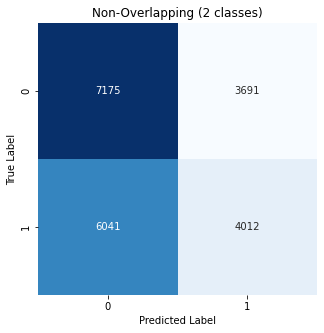

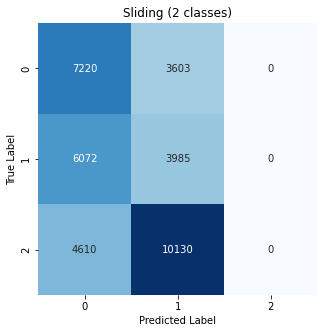

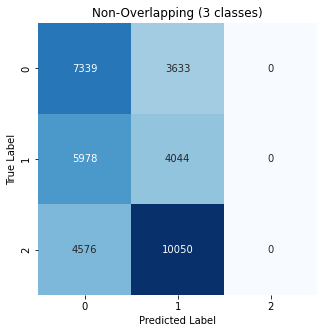

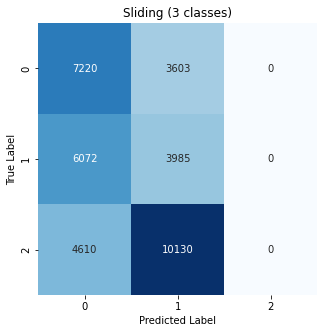

In [16]:
# --- Construct confusion matrices ---

def calculate_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    # Visualize the confusion matrix using seaborn
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()


# Calculate and visualize confusion matrix for each category
calculate_confusion_matrix(y_test_non_overlap_2, (lasso_model.predict(X_test_non_overlap_2) > 0.5).astype(int), 'Non-Overlapping (2 classes)')
calculate_confusion_matrix(y_test_sliding_2, (lasso_model.predict(X_test_sliding_2) > 0.5).astype(int), 'Sliding (2 classes)')
calculate_confusion_matrix(y_test_non_overlap_3, (lasso_model.predict(X_test_non_overlap_3) > 0.5).astype(int), 'Non-Overlapping (3 classes)')
calculate_confusion_matrix(y_test_sliding_3, (lasso_model.predict(X_test_sliding_3) > 0.5).astype(int), 'Sliding (3 classes)')



In [17]:
# --- Calculate performance measures ---

def calculate_performance(y_true, y_pred, title):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Use weighted average for multiclass
    print(f'{title}:\nAccuracy: {accuracy:.4f}, F1-score: {f1:.4f}\n')

# Calculate and print performance for each category
calculate_performance(y_test_non_overlap_2, (lasso_model.predict(X_test_non_overlap_2) > 0.5).astype(int), 'Non-Overlapping (2 classes)')
calculate_performance(y_test_sliding_2, (lasso_model.predict(X_test_sliding_2) > 0.5).astype(int), 'Sliding (2 classes)')
calculate_performance(y_test_non_overlap_3, (lasso_model.predict(X_test_non_overlap_3) > 0.5).astype(int), 'Non-Overlapping (3 classes)')
calculate_performance(y_test_sliding_3, (lasso_model.predict(X_test_sliding_3) > 0.5).astype(int), 'Sliding (3 classes)')

Non-Overlapping (2 classes):
Accuracy: 0.5348, F1-score: 0.5267

Sliding (2 classes):
Accuracy: 0.3146, F1-score: 0.2338

Non-Overlapping (3 classes):
Accuracy: 0.3196, F1-score: 0.2386

Sliding (3 classes):
Accuracy: 0.3146, F1-score: 0.2338



----- Non-Overlapping (2 classes) -----


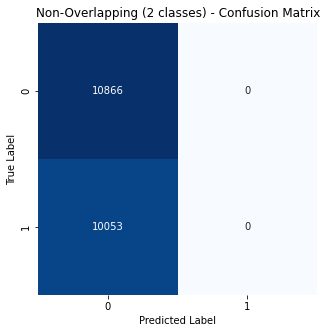

Non-Overlapping (2 classes) - Accuracy: 0.5194, F1-score: 0.3551

----- Sliding (2 classes) -----


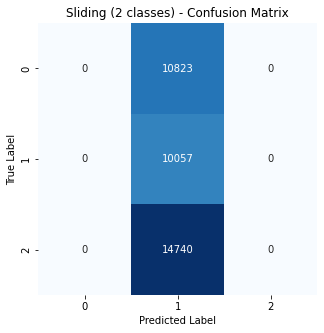

Sliding (2 classes) - Accuracy: 0.2823, F1-score: 0.1243

----- Non-Overlapping (3 classes) -----


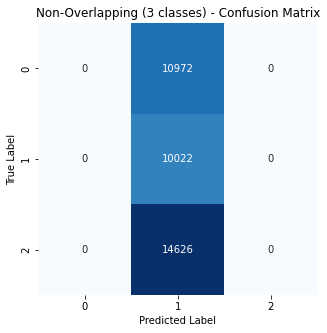

Non-Overlapping (3 classes) - Accuracy: 0.2814, F1-score: 0.1236

----- Sliding (3 classes) -----


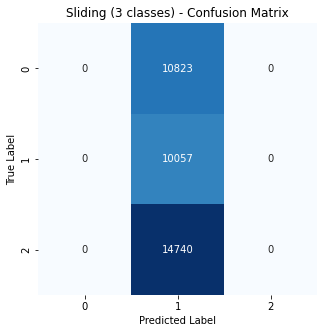

Sliding (3 classes) - Accuracy: 0.2823, F1-score: 0.1243



In [18]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the datasets ---
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

df_non_overlapping_2 = pd.read_csv(f'{image_folder}\image01.csv')
df_sliding_2 = pd.read_csv(f'{image_folder}\herb_sliding_block_feature_vectors1.csv')
df_non_overlapping_3 = pd.read_csv(f'{image_folder}\image012.csv')
df_sliding_3 = pd.read_csv(f'{image_folder}\herb_sliding_block_feature_vectors1.csv')

# --- Divide the data domain into 80:20 (training:testing) ---
def split_data(df):
    X = df.drop('label', axis=1)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

datasets = {
    'Non-Overlapping (2 classes)': split_data(df_non_overlapping_2),
    'Sliding (2 classes)': split_data(df_sliding_2),
    'Non-Overlapping (3 classes)': split_data(df_non_overlapping_3),
    'Sliding (3 classes)': split_data(df_sliding_3)
}

# --- Standardize the features ---
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    datasets[dataset_name] = (X_train, X_test, y_train, y_test)

# --- Train and evaluate the Lasso model ---
def train_and_evaluate_model(X_train, y_train, X_test, y_test, dataset_name):
    lasso_model = Lasso(alpha=0.1, random_state=42)
    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)
    threshold = 0.5
    y_pred_binary = (y_pred > threshold).astype(int)

    # --- Construct and visualize confusion matrix ---
    cm = confusion_matrix(y_test, y_pred_binary)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{dataset_name} - Confusion Matrix')
    plt.show()

    # --- Calculate performance measures ---
    accuracy = accuracy_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary, average='weighted')
    print(f'{dataset_name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}\n')

for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    print(f'----- {dataset_name} -----')
    train_and_evaluate_model(X_train, y_train, X_test, y_test, dataset_name)

### Task2 with feature selection code

In [1]:
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [3]:
import pandas as pd

In [4]:
from sklearn.linear_model import Lasso

In [5]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# --- Load the datasets ---
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

df_non_overlapping_2 = pd.read_csv(f'{image_folder}\image01.csv')
df_sliding_2 = pd.read_csv(f'{image_folder}\herb_sliding_block_feature_vectors1.csv')
df_non_overlapping_3 = pd.read_csv(f'{image_folder}\image012.csv')
df_sliding_3 = pd.read_csv(f'{image_folder}\herb_sliding_block_feature_vectors1.csv')


In [8]:
# --- Divide the data domain into 80:20 (training:testing) ---
def split_data(df):
    X = df.drop('label', axis=1)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test  # All variables should be at the same indentation level

datasets = {
    'Non-Overlapping (2 classes)': split_data(df_non_overlapping_2),
    'Sliding (2 classes)': split_data(df_sliding_2),
    'Non-Overlapping (3 classes)': split_data(df_non_overlapping_3),
    'Sliding (3 classes)': split_data(df_sliding_3)
}


In [9]:
# --- Standardize the features ---
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    datasets[dataset_name] = (X_train, X_test, y_train, y_test)

----- Non-Overlapping (2 classes) -----


C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

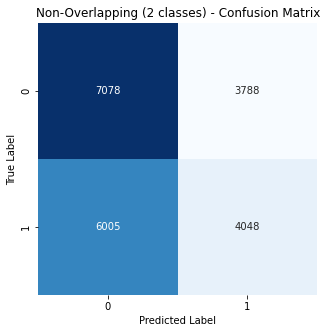

Non-Overlapping (2 classes) - Best Parameters: {'alpha': 0.001}
Non-Overlapping (2 classes) - Accuracy: 0.5319, F1-score: 0.5245

              precision    recall  f1-score   support

           0       0.54      0.65      0.59     10866
           1       0.52      0.40      0.45     10053

    accuracy                           0.53     20919
   macro avg       0.53      0.53      0.52     20919
weighted avg       0.53      0.53      0.52     20919

----- Sliding (2 classes) -----


C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

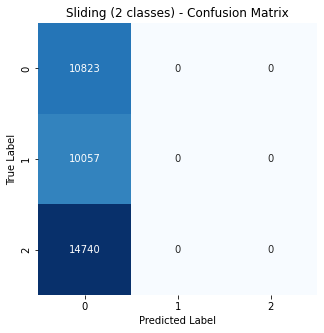

Sliding (2 classes) - Best Parameters: {'alpha': 0.001}
Sliding (2 classes) - Accuracy: 0.3038, F1-score: 0.1416

              precision    recall  f1-score   support

           0       0.30      1.00      0.47     10823
           1       0.00      0.00      0.00     10057
           2       0.00      0.00      0.00     14740

    accuracy                           0.30     35620
   macro avg       0.10      0.33      0.16     35620
weighted avg       0.09      0.30      0.14     35620

----- Non-Overlapping (3 classes) -----


C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

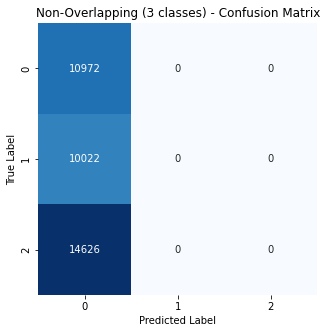

Non-Overlapping (3 classes) - Best Parameters: {'alpha': 0.001}
Non-Overlapping (3 classes) - Accuracy: 0.3080, F1-score: 0.1451

              precision    recall  f1-score   support

           0       0.31      1.00      0.47     10972
           1       0.00      0.00      0.00     10022
           2       0.00      0.00      0.00     14626

    accuracy                           0.31     35620
   macro avg       0.10      0.33      0.16     35620
weighted avg       0.09      0.31      0.15     35620

----- Sliding (3 classes) -----


C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Pradeep Nadella\anaconda3\lib

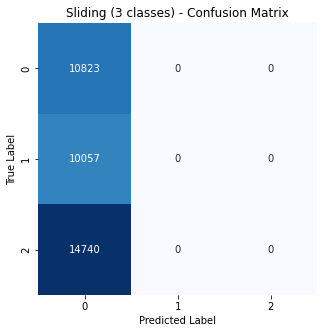

Sliding (3 classes) - Best Parameters: {'alpha': 0.001}
Sliding (3 classes) - Accuracy: 0.3038, F1-score: 0.1416

              precision    recall  f1-score   support

           0       0.30      1.00      0.47     10823
           1       0.00      0.00      0.00     10057
           2       0.00      0.00      0.00     14740

    accuracy                           0.30     35620
   macro avg       0.10      0.33      0.16     35620
weighted avg       0.09      0.30      0.14     35620



C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# --- Hyperparameter tuning and model training (Lasso only) ---

def train_and_evaluate_lasso(X_train, y_train, X_test, y_test, dataset_name):
    """
    Trains and evaluates a Lasso model with hyperparameter tuning and feature selection.
    """
    # --- Hyperparameter tuning for Lasso ---
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
    lasso = Lasso(random_state=42)
    grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # --- Feature selection based on Lasso coefficients ---
    feature_importances = np.abs(best_model.coef_)
    N = 50  # Example: Select the top 50 features
    top_feature_indices = np.argsort(feature_importances)[::-1][:N]
    X_train_selected = X_train[:, top_feature_indices]
    X_test_selected = X_test[:, top_feature_indices]

    # --- Retrain the model with selected features ---
    best_model.fit(X_train_selected, y_train)

    y_pred = best_model.predict(X_test_selected)

    # --- Convert continuous predictions to class labels ---
    if len(np.unique(y_train)) > 2:
        y_pred_binary = np.argmax(y_pred.reshape(-1, 1), axis=1)  # Multiclass
    else:
        threshold = 0.5
        y_pred_binary = (y_pred > threshold).astype(int)  # Binary

    # --- Construct and visualize confusion matrix ---
    cm = confusion_matrix(y_test, y_pred_binary)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{dataset_name} - Confusion Matrix')
    plt.show()

    # --- Calculate performance measures ---
    accuracy = accuracy_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary, average='weighted')
    print(f'{dataset_name} - Best Parameters: {grid_search.best_params_}')
    print(f'{dataset_name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}\n')
    print(classification_report(y_test, y_pred_binary))

# --- Train and evaluate Lasso for each dataset ---
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    print(f'----- {dataset_name} -----')
    train_and_evaluate_lasso(X_train, y_train, X_test, y_test, dataset_name)

Task3

----- Non-Overlapping (2 classes) -----


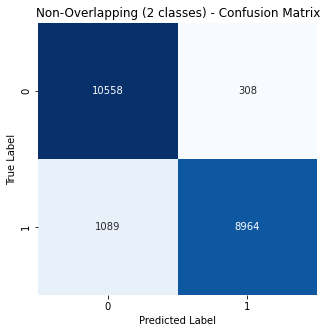

Non-Overlapping (2 classes) - Accuracy: 0.9332, F1-score: 0.9330

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10866
           1       0.97      0.89      0.93     10053

    accuracy                           0.93     20919
   macro avg       0.94      0.93      0.93     20919
weighted avg       0.94      0.93      0.93     20919

----- Sliding (2 classes) -----


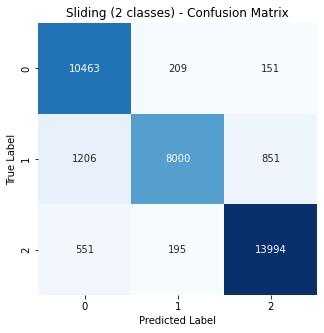

Sliding (2 classes) - Accuracy: 0.9112, F1-score: 0.9101

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     10823
           1       0.95      0.80      0.87     10057
           2       0.93      0.95      0.94     14740

    accuracy                           0.91     35620
   macro avg       0.91      0.90      0.91     35620
weighted avg       0.92      0.91      0.91     35620

----- Non-Overlapping (3 classes) -----


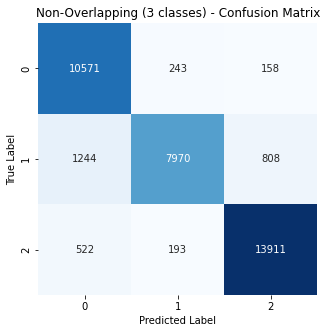

Non-Overlapping (3 classes) - Accuracy: 0.9111, F1-score: 0.9100

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10972
           1       0.95      0.80      0.86     10022
           2       0.94      0.95      0.94     14626

    accuracy                           0.91     35620
   macro avg       0.91      0.90      0.91     35620
weighted avg       0.91      0.91      0.91     35620

----- Sliding (3 classes) -----


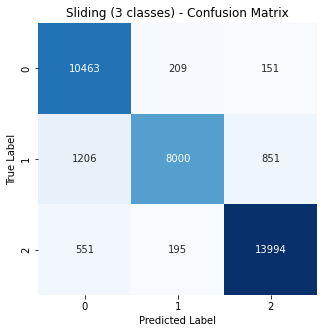

Sliding (3 classes) - Accuracy: 0.9112, F1-score: 0.9101

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     10823
           1       0.95      0.80      0.87     10057
           2       0.93      0.95      0.94     14740

    accuracy                           0.91     35620
   macro avg       0.91      0.90      0.91     35620
weighted avg       0.92      0.91      0.91     35620



In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the datasets ---
# (Assuming you have the code to load your datasets from previous tasks)

# --- Divide the data domain into 80:20 (training:testing) ---
# ... (Use the split_data function from Task 1)

# --- Standardize the features ---
# ... (Standardize the features as before)

# --- Train and evaluate the Random Forest model ---

def train_and_evaluate_rf(X_train, y_train, X_test, y_test, dataset_name):
    """
    Trains and evaluates a Random Forest model.
    """
    rf_model = RandomForestClassifier(random_state=42)  # Initialize the Random Forest model
    rf_model.fit(X_train, y_train)  # Train the model on the training data

    y_pred = rf_model.predict(X_test)  # Predict labels for the test data

    # --- Construct and visualize confusion matrix ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{dataset_name} - Confusion Matrix')
    plt.show()

    # --- Calculate performance measures ---
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{dataset_name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}\n')
    print(classification_report(y_test, y_pred))

# --- Train and evaluate Random Forest for each dataset ---
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    print(f'----- {dataset_name} -----')
    train_and_evaluate_rf(X_train, y_train, X_test, y_test, dataset_name)

### ROC curves for task2
### Code example (for Task 2, non-overlapping 2-class dataset)



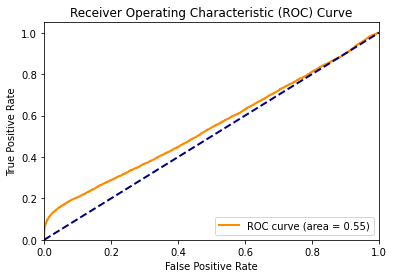

In [20]:
from sklearn.metrics import roc_curve, auc

# ... (your existing code)

# --- After training the Lasso model ---
y_pred_prob = lasso_model.predict(X_test_non_overlap_2)  # Get predicted probabilities

# Generate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_non_overlap_2, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

----- Non-Overlapping (2 classes) - ROC Curve -----


C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


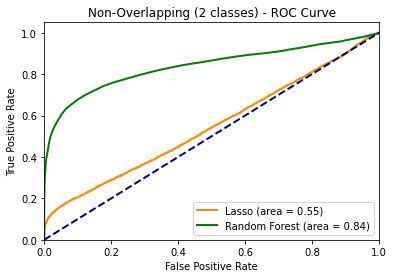

----- Sliding (2 classes) - ROC Curve -----


C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


ValueError: multiclass format is not supported

In [27]:
# ... (Your existing code for loading, splitting, standardizing, and training the models)

# --- ROC Curve (only for 2-class datasets) ---
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    if '2 classes' in dataset_name:
        print(f'----- {dataset_name} - ROC Curve -----')

        # --- Lasso ---
        y_pred_prob_lasso = lasso_model.predict(X_test)  # Get predicted probabilities from Lasso
        fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_pred_prob_lasso)
        roc_auc_lasso = auc(fpr_lasso, tpr_lasso)

        # --- Random Forest ---
        y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 from Random Forest
        fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
        roc_auc_rf = auc(fpr_rf, tpr_rf)

        # Plot ROC curves
        plt.figure()
        plt.plot(fpr_lasso, tpr_lasso, color='darkorange', lw=2, label=f'Lasso (area = {roc_auc_lasso:.2f})')
        plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (area = {roc_auc_rf:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{dataset_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

In [28]:
print(np.unique(y_test))

[0 1 2]


In [29]:
print(y_test.dtype)

int64


## Assignment2
### Task1

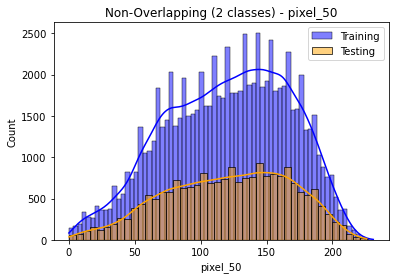

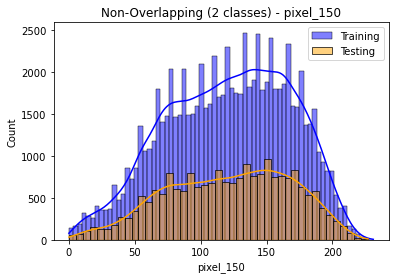

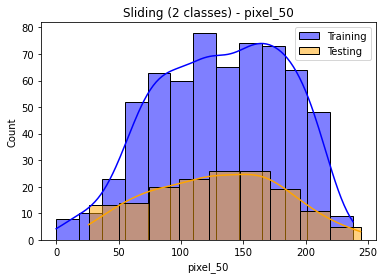

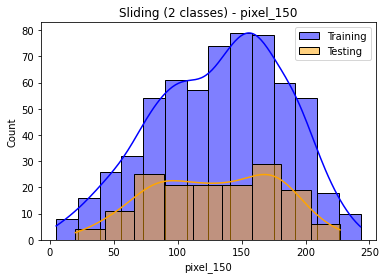

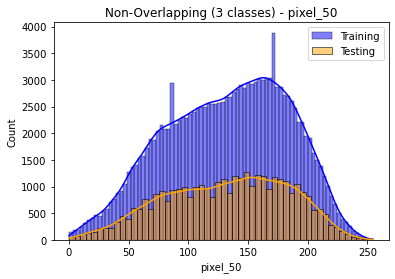

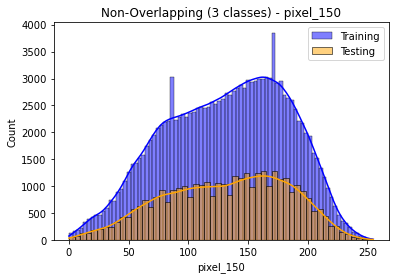

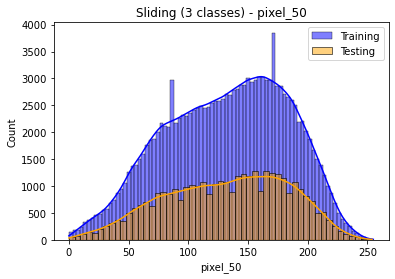

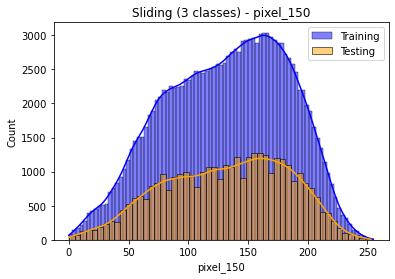

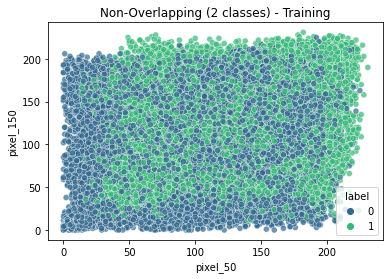

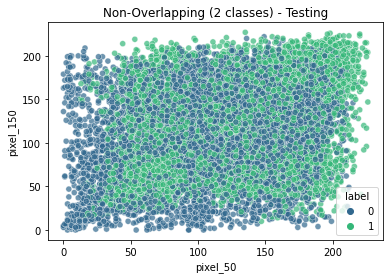

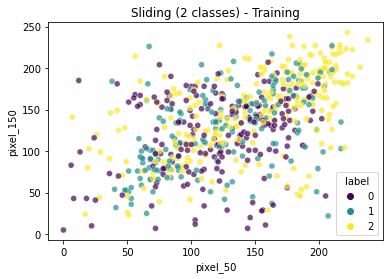

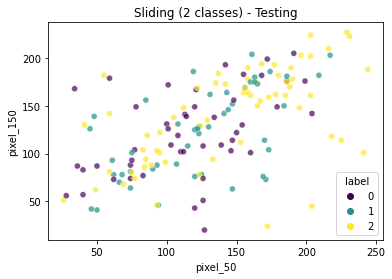

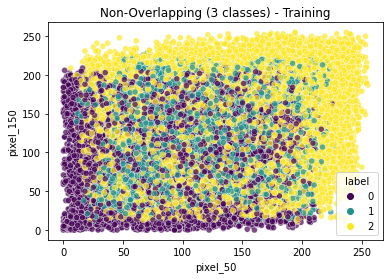

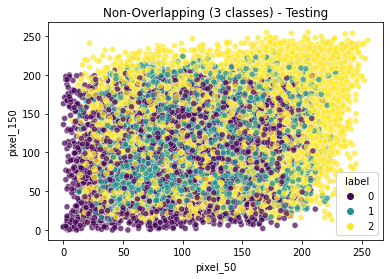

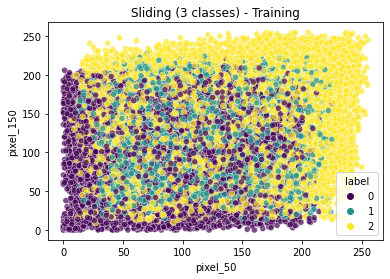

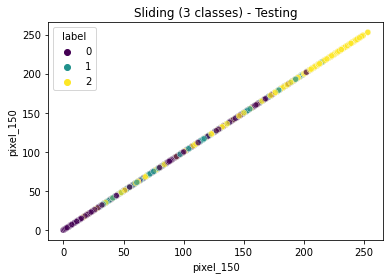

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# --- Load the datasets ---
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

df_non_overlapping_2 = pd.read_csv(f'{image_folder}\image01.csv')
df_non_overlapping_3 = pd.read_csv(f'{image_folder}\image012.csv')
df_sliding_2 = pd.read_csv(f'{image_folder}\herb_feature_vectors1.csv')
df_sliding_3 = pd.read_csv(f'{image_folder}\herb_sliding_block_feature_vectors1.csv')

# --- Divide the data domain into 80:20 (training:testing) ---
def split_data(df, dataset_name):  
    X = df.drop('label', axis=1)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Save the training and testing sets to CSV files
    X_train.to_csv(f'{dataset_name}_X_train.csv', index=False)
    X_test.to_csv(f'{dataset_name}_X_test.csv', index=False)
    y_train.to_csv(f'{dataset_name}_y_train.csv', index=False)
    y_test.to_csv(f'{dataset_name}_y_test.csv', index=False)
    
    return X_train, X_test, y_train, y_test

# Split each DataFrame
X_train_non_overlap_2, X_test_non_overlap_2, y_train_non_overlap_2, y_test_non_overlap_2 = split_data(df_non_overlapping_2, 'non_overlapping_2')
X_train_sliding_2, X_test_sliding_2, y_train_sliding_2, y_test_sliding_2 = split_data(df_sliding_2, 'sliding_2')
X_train_non_overlap_3, X_test_non_overlap_3, y_train_non_overlap_3, y_test_non_overlap_3 = split_data(df_non_overlapping_3, 'non_overlapping_3')
X_train_sliding_3, X_test_sliding_3, y_train_sliding_3, y_test_sliding_3 = split_data(df_sliding_3, 'sliding_3')


# --- Select two features and plot histograms ---
feature1 = 'pixel_50'
feature2 = 'pixel_150'

# Function to plot histograms for training and testing sets
def plot_histograms(X_train, X_test, feature, title):
    plt.figure()
    sns.histplot(X_train[feature], color='blue', label='Training', kde=True)
    sns.histplot(X_test[feature], color='orange', label='Testing', kde=True)
    plt.title(title)
    plt.legend()
    plt.show()

# Plot histograms for each category
plot_histograms(X_train_non_overlap_2, X_test_non_overlap_2, feature1, f'Non-Overlapping (2 classes) - {feature1}')
plot_histograms(X_train_non_overlap_2, X_test_non_overlap_2, feature2, f'Non-Overlapping (2 classes) - {feature2}')
plot_histograms(X_train_sliding_2, X_test_sliding_2, feature1, f'Sliding (2 classes) - {feature1}')
plot_histograms(X_train_sliding_2, X_test_sliding_2, feature2, f'Sliding (2 classes) - {feature2}')
plot_histograms(X_train_non_overlap_3, X_test_non_overlap_3, feature1, f'Non-Overlapping (3 classes) - {feature1}')
plot_histograms(X_train_non_overlap_3, X_test_non_overlap_3, feature2, f'Non-Overlapping (3 classes) - {feature2}')
plot_histograms(X_train_sliding_3, X_test_sliding_3, feature1, f'Sliding (3 classes) - {feature1}')
plot_histograms(X_train_sliding_3, X_test_sliding_3, feature2, f'Sliding (3 classes) - {feature2}')

# --- Generate scatter plots ---

# Function to plot scatter plots for training and testing sets
def plot_scatter(X, y, feature1, feature2, title):
    plt.figure()
    sns.scatterplot(x=X[feature1], y=X[feature2], hue=y, palette='viridis', alpha=0.7)
    plt.title(title)
    plt.show()

# Plot scatter plots for each category
plot_scatter(X_train_non_overlap_2, y_train_non_overlap_2, feature1, feature2, 'Non-Overlapping (2 classes) - Training')
plot_scatter(X_test_non_overlap_2, y_test_non_overlap_2, feature1, feature2, 'Non-Overlapping (2 classes) - Testing')
plot_scatter(X_train_sliding_2, y_train_sliding_2, feature1, feature2, 'Sliding (2 classes) - Training')
plot_scatter(X_test_sliding_2, y_test_sliding_2, feature1, feature2, 'Sliding (2 classes) - Testing')
plot_scatter(X_train_non_overlap_3, y_train_non_overlap_3, feature1, feature2, 'Non-Overlapping (3 classes) - Training')
plot_scatter(X_test_non_overlap_3, y_test_non_overlap_3, feature1, feature2, 'Non-Overlapping (3 classes) - Testing')
plot_scatter(X_train_sliding_3, y_train_sliding_3, feature1, feature2, 'Sliding (3 classes) - Training')
plot_scatter(X_test_sliding_3, y_test_sliding_3, feature2, feature2, 'Sliding (3 classes) - Testing')  # Corrected feature2 here

### Task2

----- Non-Overlapping (2 classes) -----


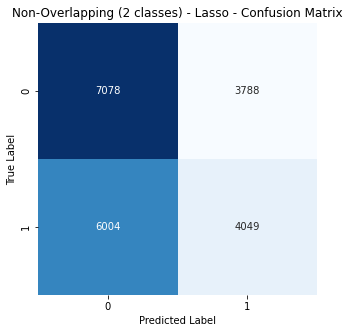

Non-Overlapping (2 classes) - Lasso - Best Parameters: {'alpha': 0.001}
Non-Overlapping (2 classes) - Lasso - Accuracy: 0.5319, F1-score: 0.5246

              precision    recall  f1-score   support

           0       0.54      0.65      0.59     10866
           1       0.52      0.40      0.45     10053

    accuracy                           0.53     20919
   macro avg       0.53      0.53      0.52     20919
weighted avg       0.53      0.53      0.52     20919



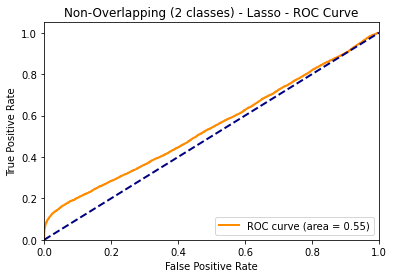

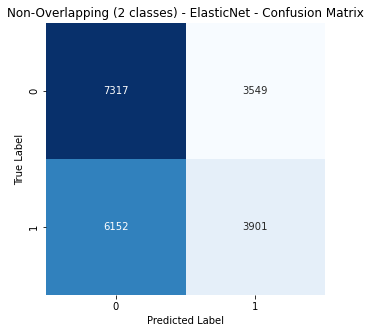

Non-Overlapping (2 classes) - ElasticNet - Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.5}
Non-Overlapping (2 classes) - ElasticNet - Accuracy: 0.5363, F1-score: 0.5266

              precision    recall  f1-score   support

           0       0.54      0.67      0.60     10866
           1       0.52      0.39      0.45     10053

    accuracy                           0.54     20919
   macro avg       0.53      0.53      0.52     20919
weighted avg       0.53      0.54      0.53     20919



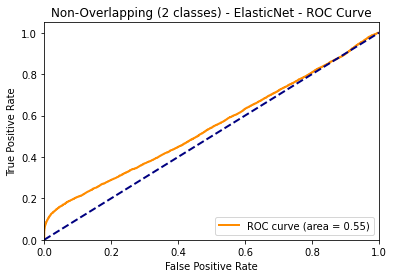

----- Sliding (2 classes) -----


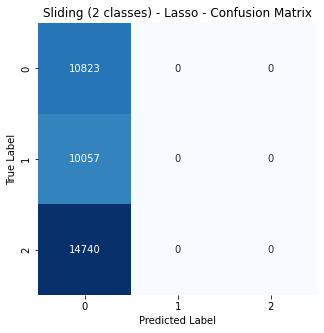

Sliding (2 classes) - Lasso - Best Parameters: {'alpha': 0.001}
Sliding (2 classes) - Lasso - Accuracy: 0.3038, F1-score: 0.1416

              precision    recall  f1-score   support

           0       0.30      1.00      0.47     10823
           1       0.00      0.00      0.00     10057
           2       0.00      0.00      0.00     14740

    accuracy                           0.30     35620
   macro avg       0.10      0.33      0.16     35620
weighted avg       0.09      0.30      0.14     35620



C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\

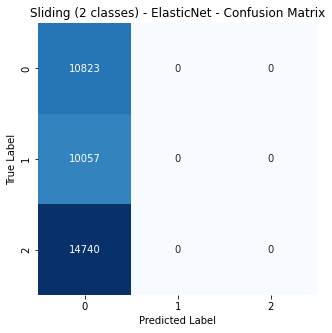

Sliding (2 classes) - ElasticNet - Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.7}
Sliding (2 classes) - ElasticNet - Accuracy: 0.3038, F1-score: 0.1416

              precision    recall  f1-score   support

           0       0.30      1.00      0.47     10823
           1       0.00      0.00      0.00     10057
           2       0.00      0.00      0.00     14740

    accuracy                           0.30     35620
   macro avg       0.10      0.33      0.16     35620
weighted avg       0.09      0.30      0.14     35620

----- Non-Overlapping (3 classes) -----


C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


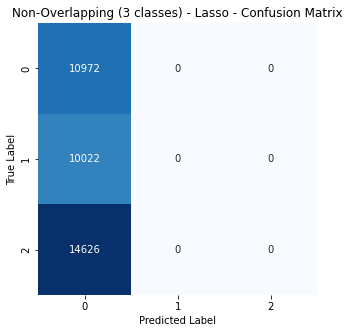

Non-Overlapping (3 classes) - Lasso - Best Parameters: {'alpha': 0.001}
Non-Overlapping (3 classes) - Lasso - Accuracy: 0.3080, F1-score: 0.1451

              precision    recall  f1-score   support

           0       0.31      1.00      0.47     10972
           1       0.00      0.00      0.00     10022
           2       0.00      0.00      0.00     14626

    accuracy                           0.31     35620
   macro avg       0.10      0.33      0.16     35620
weighted avg       0.09      0.31      0.15     35620



C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\

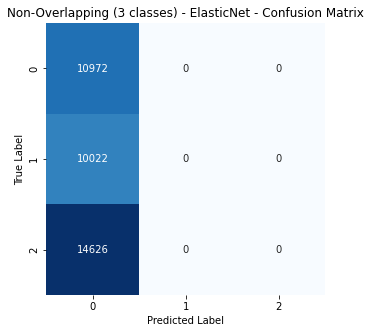

Non-Overlapping (3 classes) - ElasticNet - Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.5}
Non-Overlapping (3 classes) - ElasticNet - Accuracy: 0.3080, F1-score: 0.1451

              precision    recall  f1-score   support

           0       0.31      1.00      0.47     10972
           1       0.00      0.00      0.00     10022
           2       0.00      0.00      0.00     14626

    accuracy                           0.31     35620
   macro avg       0.10      0.33      0.16     35620
weighted avg       0.09      0.31      0.15     35620

----- Sliding (3 classes) -----


C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


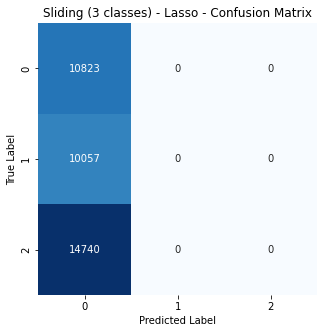

Sliding (3 classes) - Lasso - Best Parameters: {'alpha': 0.001}
Sliding (3 classes) - Lasso - Accuracy: 0.3038, F1-score: 0.1416

              precision    recall  f1-score   support

           0       0.30      1.00      0.47     10823
           1       0.00      0.00      0.00     10057
           2       0.00      0.00      0.00     14740

    accuracy                           0.30     35620
   macro avg       0.10      0.33      0.16     35620
weighted avg       0.09      0.30      0.14     35620



C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\

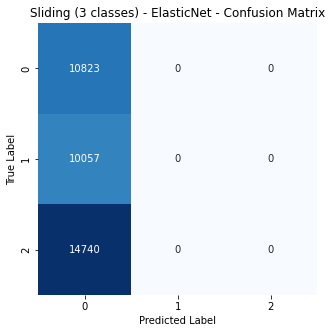

Sliding (3 classes) - ElasticNet - Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.7}
Sliding (3 classes) - ElasticNet - Accuracy: 0.3038, F1-score: 0.1416

              precision    recall  f1-score   support

           0       0.30      1.00      0.47     10823
           1       0.00      0.00      0.00     10057
           2       0.00      0.00      0.00     14740

    accuracy                           0.30     35620
   macro avg       0.10      0.33      0.16     35620
weighted avg       0.09      0.30      0.14     35620



C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
import pandas as pd
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, dataset_name):
    """
    Trains and evaluates a model (Lasso or ElasticNet) with hyperparameter tuning and generates ROC curves (if applicable).
    """
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    # Convert continuous predictions to binary labels (if necessary)
    if len(np.unique(y_train)) > 2:
        y_pred_binary = np.argmax(y_pred.reshape(-1, 1), axis=1)  # Multiclass
    else:
        threshold = 0.5
        y_pred_binary = (y_pred > threshold).astype(int)  # Binary

    # --- Construct and visualize confusion matrix ---
    cm = confusion_matrix(y_test, y_pred_binary)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{dataset_name} - Confusion Matrix')
    plt.show()

    # --- Calculate performance measures ---
    accuracy = accuracy_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary, average='weighted')
    print(f'{dataset_name} - Best Parameters: {grid_search.best_params_}')
    print(f'{dataset_name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}\n')
    print(classification_report(y_test, y_pred_binary))

    # --- Generate ROC curve (only for 2-class datasets) ---
    if len(np.unique(y_train)) == 2:
        fpr, tpr, _ = roc_curve(y_test, y_pred)  # Use continuous predictions for ROC
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{dataset_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

# --- Train and evaluate models for each dataset ---
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    print(f'----- {dataset_name} -----')

    # --- Lasso ---
    lasso_model = Lasso(random_state=42)
    lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
    train_and_evaluate_model(lasso_model, lasso_param_grid, X_train, y_train, X_test, y_test, dataset_name + ' - Lasso')

    # --- ElasticNet ---
    elastic_net_model = ElasticNet(random_state=42)
    elastic_net_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]}
    train_and_evaluate_model(elastic_net_model, elastic_net_param_grid, X_train, y_train, X_test, y_test, dataset_name + ' - ElasticNet')

### Task3

----- Non-Overlapping (2 classes) -----


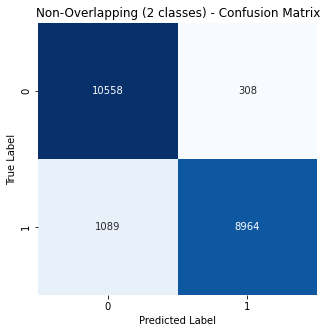

Non-Overlapping (2 classes) - Accuracy: 0.9332, F1-score: 0.9330

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10866
           1       0.97      0.89      0.93     10053

    accuracy                           0.93     20919
   macro avg       0.94      0.93      0.93     20919
weighted avg       0.94      0.93      0.93     20919



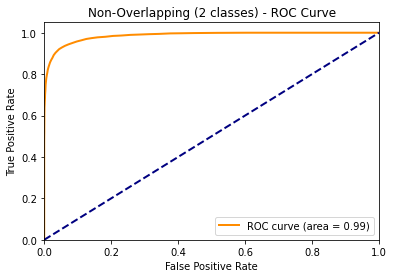

----- Sliding (2 classes) -----


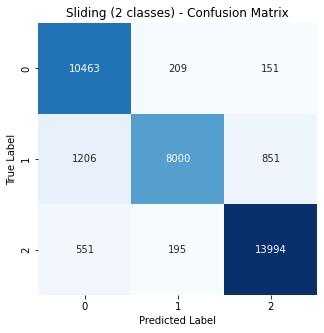

Sliding (2 classes) - Accuracy: 0.9112, F1-score: 0.9101

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     10823
           1       0.95      0.80      0.87     10057
           2       0.93      0.95      0.94     14740

    accuracy                           0.91     35620
   macro avg       0.91      0.90      0.91     35620
weighted avg       0.92      0.91      0.91     35620

----- Non-Overlapping (3 classes) -----


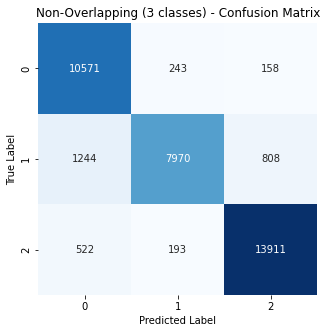

Non-Overlapping (3 classes) - Accuracy: 0.9111, F1-score: 0.9100

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10972
           1       0.95      0.80      0.86     10022
           2       0.94      0.95      0.94     14626

    accuracy                           0.91     35620
   macro avg       0.91      0.90      0.91     35620
weighted avg       0.91      0.91      0.91     35620

----- Sliding (3 classes) -----


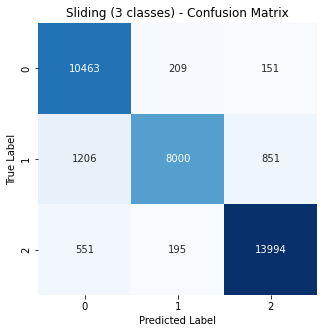

Sliding (3 classes) - Accuracy: 0.9112, F1-score: 0.9101

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     10823
           1       0.95      0.80      0.87     10057
           2       0.93      0.95      0.94     14740

    accuracy                           0.91     35620
   macro avg       0.91      0.90      0.91     35620
weighted avg       0.92      0.91      0.91     35620



In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Train and evaluate the Random Forest model ---

def train_and_evaluate_rf(X_train, y_train, X_test, y_test, dataset_name):
    """
    Trains and evaluates a Random Forest model with ROC analysis (if applicable).
    """
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    # --- Construct and visualize confusion matrix ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{dataset_name} - Confusion Matrix')
    plt.show()

    # --- Calculate performance measures ---
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{dataset_name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}\n')
    print(classification_report(y_test, y_pred))

    # --- Generate ROC curve (only for 2-class datasets) ---
    if len(np.unique(y_train)) == 2:
        y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{dataset_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

# --- Train and evaluate Random Forest for each dataset ---
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    print(f'----- {dataset_name} -----')
    train_and_evaluate_rf(X_train, y_train, X_test, y_test, dataset_name)

----- Non-Overlapping (2 classes) -----


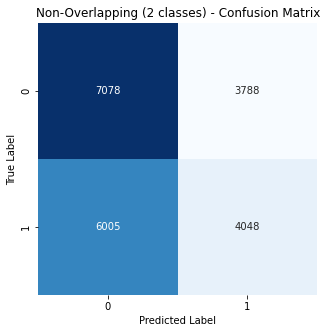

Non-Overlapping (2 classes) - Best Parameters: {'alpha': 0.001}
Non-Overlapping (2 classes) - Accuracy: 0.5319, F1-score: 0.5245

              precision    recall  f1-score   support

           0       0.54      0.65      0.59     10866
           1       0.52      0.40      0.45     10053

    accuracy                           0.53     20919
   macro avg       0.53      0.53      0.52     20919
weighted avg       0.53      0.53      0.52     20919

----- Sliding (2 classes) -----


C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.526e+00, tolerance: 3.533e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.581e+00, tolerance: 3.546e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

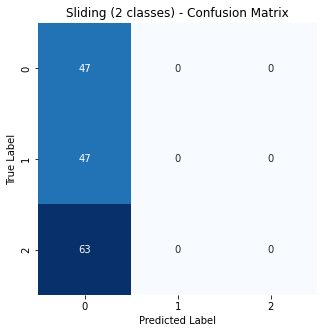

Sliding (2 classes) - Best Parameters: {'alpha': 0.1}
Sliding (2 classes) - Accuracy: 0.2994, F1-score: 0.1379

              precision    recall  f1-score   support

           0       0.30      1.00      0.46        47
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        63

    accuracy                           0.30       157
   macro avg       0.10      0.33      0.15       157
weighted avg       0.09      0.30      0.14       157



C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----- Non-Overlapping (3 classes) -----


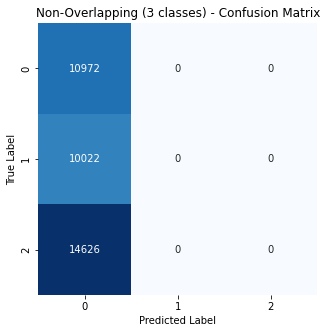

Non-Overlapping (3 classes) - Best Parameters: {'alpha': 0.001}
Non-Overlapping (3 classes) - Accuracy: 0.3080, F1-score: 0.1451

              precision    recall  f1-score   support

           0       0.31      1.00      0.47     10972
           1       0.00      0.00      0.00     10022
           2       0.00      0.00      0.00     14626

    accuracy                           0.31     35620
   macro avg       0.10      0.33      0.16     35620
weighted avg       0.09      0.31      0.15     35620



C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----- Sliding (3 classes) -----


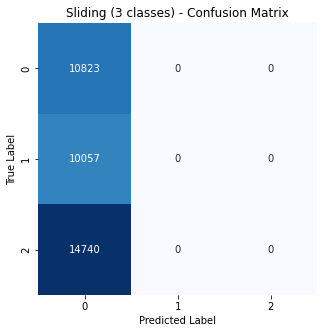

Sliding (3 classes) - Best Parameters: {'alpha': 0.001}
Sliding (3 classes) - Accuracy: 0.3038, F1-score: 0.1416

              precision    recall  f1-score   support

           0       0.30      1.00      0.47     10823
           1       0.00      0.00      0.00     10057
           2       0.00      0.00      0.00     14740

    accuracy                           0.30     35620
   macro avg       0.10      0.33      0.16     35620
weighted avg       0.09      0.30      0.14     35620



C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Load the datasets ---
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

df_non_overlapping_2 = pd.read_csv(f'{image_folder}\image01.csv')
df_sliding_2 = pd.read_csv(f'{image_folder}\herb_feature_vectors1.csv')
df_non_overlapping_3 = pd.read_csv(f'{image_folder}\image012.csv')
df_sliding_3 = pd.read_csv(f'{image_folder}\herb_sliding_block_feature_vectors1.csv')

# --- Divide the data domain into 80:20 (training:testing) ---
def split_data(df):
    X = df.drop('label', axis=1)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

datasets = {
    'Non-Overlapping (2 classes)': split_data(df_non_overlapping_2),
    'Sliding (2 classes)': split_data(df_sliding_2),
    'Non-Overlapping (3 classes)': split_data(df_non_overlapping_3),
    'Sliding (3 classes)': split_data(df_sliding_3)
}

# --- Standardize the features ---
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Add the original DataFrame to the datasets dictionary
    if dataset_name == 'Non-Overlapping (2 classes)':
        datasets[dataset_name] = (X_train, X_test, y_train, y_test, df_non_overlapping_2)
    elif dataset_name == 'Sliding (2 classes)':
        datasets[dataset_name] = (X_train, X_test, y_train, y_test, df_sliding_2)
    elif dataset_name == 'Non-Overlapping (3 classes)':
        datasets[dataset_name] = (X_train, X_test, y_train, y_test, df_non_overlapping_3)
    else:  # 'Sliding (3 classes)'
        datasets[dataset_name] = (X_train, X_test, y_train, y_test, df_sliding_3)

# --- Hyperparameter tuning and model training (Lasso only) ---

def train_and_evaluate_lasso(X_train, y_train, X_test, y_test, df, dataset_name):  # Add df as an argument
    """
    Trains and evaluates a Lasso model with hyperparameter tuning and feature selection.
    """
    # --- Hyperparameter tuning for Lasso ---
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
    lasso = Lasso(random_state=42)
    grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # --- Feature selection based on Lasso coefficients ---
    feature_importances = np.abs(best_model.coef_)
    N = 50  # Example: Select the top 50 features
    top_feature_indices = np.argsort(feature_importances)[::-1][:N]
    X_train_selected = X_train[:, top_feature_indices]
    X_test_selected = X_test[:, top_feature_indices]

    # --- Retrain the model with selected features ---
    best_model.fit(X_train_selected, y_train)

    # --- Predict labels (using the retrained model with selected features) ---
    y_pred = best_model.predict(X_test_selected)

    # --- Convert continuous predictions to class labels ---
    if len(np.unique(y_train)) > 2:
        y_pred_binary = np.argmax(y_pred.reshape(-1, 1), axis=1)  # Multiclass
    else:
        threshold = 0.5
        y_pred_binary = (y_pred > threshold).astype(int)  # Binary

    # --- Construct and visualize confusion matrix ---
    cm = confusion_matrix(y_test, y_pred_binary)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{dataset_name} - Confusion Matrix')
    plt.show()

    # --- Calculate performance measures ---
    accuracy = accuracy_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary, average='weighted')
    print(f'{dataset_name} - Best Parameters: {grid_search.best_params_}')
    print(f'{dataset_name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}\n')
    print(classification_report(y_test, y_pred_binary))

    # --- Add predicted labels to the DataFrame and save ---
    df_pred = pd.DataFrame({'predicted_label': y_pred_binary})
    df_combined = pd.concat([df, df_pred], axis=1)  # Combine the original DataFrame with predicted labels
    df_combined.to_csv(f'{dataset_name}_lasso_with_predictions.csv', index=False)

# --- Train and evaluate Lasso for each dataset ---
for dataset_name, (X_train, X_test, y_train, y_test, df) in datasets.items():  # Unpack the DataFrame as well
    print(f'----- {dataset_name} -----')
    train_and_evaluate_lasso(X_train, y_train, X_test, y_test, df, dataset_name)  # Pass the DataFrame to the function

In [42]:
print(type(df))

<class 'tuple'>


In [43]:
# ... (your existing code)

results = {}
for dataset_name, data in datasets.items():  # Use 'data' instead of 'df' to avoid confusion
    print(type(data))  # Print the type of 'data' to check if it's a DataFrame
    if isinstance(data, pd.DataFrame):  # Check if 'data' is a DataFrame
        df = data  # Assign it to 'df' if it is
        y_true = df['label']
        y_pred_lasso = df['predicted_label']
        # ... (rest of your code)
    else:
        print(f"Error: {dataset_name} is not a DataFrame")

<class 'tuple'>
Error: Non-Overlapping (2 classes) is not a DataFrame
<class 'tuple'>
Error: Sliding (2 classes) is not a DataFrame
<class 'tuple'>
Error: Non-Overlapping (3 classes) is not a DataFrame
<class 'tuple'>
Error: Sliding (3 classes) is not a DataFrame


## TASK3 (save the csv files)

----- Non-Overlapping (2 classes) -----


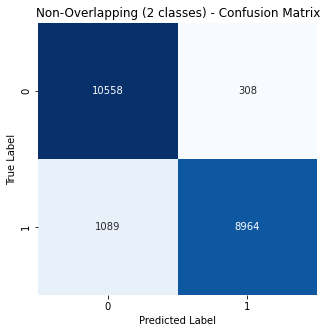

Non-Overlapping (2 classes) - Accuracy: 0.9332, F1-score: 0.9330

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10866
           1       0.97      0.89      0.93     10053

    accuracy                           0.93     20919
   macro avg       0.94      0.93      0.93     20919
weighted avg       0.94      0.93      0.93     20919



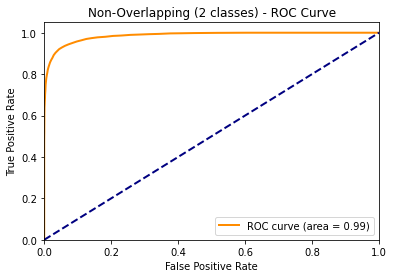

----- Sliding (2 classes) -----


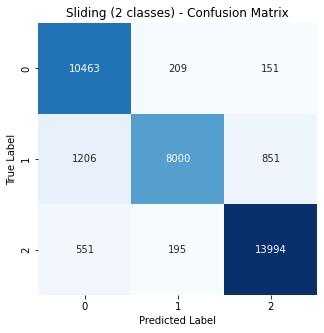

Sliding (2 classes) - Accuracy: 0.9112, F1-score: 0.9101

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     10823
           1       0.95      0.80      0.87     10057
           2       0.93      0.95      0.94     14740

    accuracy                           0.91     35620
   macro avg       0.91      0.90      0.91     35620
weighted avg       0.92      0.91      0.91     35620

----- Non-Overlapping (3 classes) -----


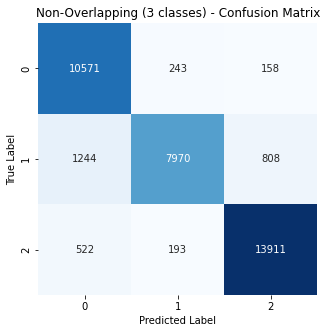

Non-Overlapping (3 classes) - Accuracy: 0.9111, F1-score: 0.9100

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10972
           1       0.95      0.80      0.86     10022
           2       0.94      0.95      0.94     14626

    accuracy                           0.91     35620
   macro avg       0.91      0.90      0.91     35620
weighted avg       0.91      0.91      0.91     35620

----- Sliding (3 classes) -----


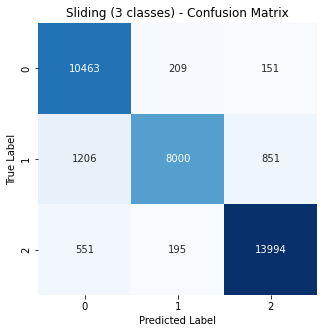

Sliding (3 classes) - Accuracy: 0.9112, F1-score: 0.9101

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     10823
           1       0.95      0.80      0.87     10057
           2       0.93      0.95      0.94     14740

    accuracy                           0.91     35620
   macro avg       0.91      0.90      0.91     35620
weighted avg       0.92      0.91      0.91     35620



In [48]:
# --- Train and evaluate the Random Forest model ---

def train_and_evaluate_rf(X_train, y_train, X_test, y_test, df_test, dataset_name):
    """
    Trains and evaluates a Random Forest model with ROC analysis (if applicable).
    """
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    # --- Add predicted labels to the DataFrame and save ---
    
    # Create a new DataFrame for the test set with predicted labels
    df_pred = pd.DataFrame({'predicted_label': y_pred}, index=y_test.index)

    # Concatenate the true labels and predicted labels in the test DataFrame
    df_test = pd.concat([df_test, df_pred], axis=1)

    df_test.to_csv(f'{dataset_name}_rf_with_predictions.csv', index=False)

    # --- Construct and visualize confusion matrix ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{dataset_name} - Confusion Matrix')
    plt.show()

    # --- Calculate performance measures ---
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{dataset_name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}\n')
    print(classification_report(y_test, y_pred))

    # --- Generate ROC curve (only for 2-class datasets) ---
    if len(np.unique(y_train)) == 2:
        y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{dataset_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

# --- Train and evaluate Random Forest for each dataset ---
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    print(f'----- {dataset_name} -----')
    
    # Get the original DataFrame for this dataset
    if dataset_name == 'Non-Overlapping (2 classes)':
        df_test = df_non_overlapping_2
    elif dataset_name == 'Sliding (2 classes)':
        df_test = df_sliding_2
    elif dataset_name == 'Non-Overlapping (3 classes)':
        df_test = df_non_overlapping_3
    else:  # 'Sliding (3 classes)'
        df_test = df_sliding_3
    
    train_and_evaluate_rf(X_train, y_train, X_test, y_test, df_test, dataset_name)

### Task4

In [64]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# --- Load the datasets with predicted labels ---
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

# Load the datasets with predicted labels from Task 2 and Task 3 (using raw strings)
df_non_overlapping_2_lasso = pd.read_csv(rf'{image_folder}\Non-Overlapping (2 classes)_lasso_with_predictions.csv')
df_non_overlapping_2_rf = pd.read_csv(rf'{image_folder}\Non-Overlapping (2 classes)_rf_with_predictions.csv')
df_sliding_2_lasso = pd.read_csv(rf'{image_folder}\Sliding (2 classes)_lasso_with_predictions.csv')
df_sliding_2_rf = pd.read_csv(rf'{image_folder}\Sliding (2 classes)_rf_with_predictions.csv')
df_non_overlapping_3_lasso = pd.read_csv(rf'{image_folder}\Non-Overlapping (3 classes)_lasso_with_predictions.csv')
df_non_overlapping_3_rf = pd.read_csv(rf'{image_folder}\Non-Overlapping (3 classes)_rf_with_predictions.csv')
df_sliding_3_lasso = pd.read_csv(rf'{image_folder}\Sliding (3 classes)_lasso_with_predictions.csv')
df_sliding_3_rf = pd.read_csv(rf'{image_folder}\Sliding (3 classes)_rf_with_predictions.csv')

# --- Prepare the datasets dictionary ---
datasets = {
    'Non-Overlapping (2 classes) - Lasso': df_non_overlapping_2_lasso,
    'Non-Overlapping (2 classes) - RF': df_non_overlapping_2_rf,
    'Sliding (2 classes) - Lasso': df_sliding_2_lasso,
    'Sliding (2 classes) - RF': df_sliding_2_rf,
    'Non-Overlapping (3 classes) - Lasso': df_non_overlapping_3_lasso,
    'Non-Overlapping (3 classes) - RF': df_non_overlapping_3_rf,
    'Sliding (3 classes) - Lasso': df_sliding_3_lasso,
    'Sliding (3 classes) - RF': df_sliding_3_rf
}

# --- Calculate built-in performance measures ---
def evaluate_performance(y_true, y_pred, dataset_name, model_name):
    """
    Calculates and prints various performance measures.
    """
    # Convert predictions to integers if they are not already
    y_pred = y_pred.astype(int)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)  # Handle zero division
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)  # Handle zero division
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)  # Handle zero division

    print(f'{dataset_name} - {model_name}:')
    print(f'  Accuracy: {accuracy:.4f}')
    print(f'  Precision: {precision:.4f}')
    print(f'  Recall: {recall:.4f}')
    print(f'  F1-score: {f1:.4f}\n')

    return accuracy, precision, recall, f1


# --- Evaluate performance for each dataset and model ---
results = {}
for dataset_name, df in datasets.items():
    # ... (your existing code to extract y_true and y_pred)

    # --- ROC Curve (only for 2-class datasets) ---
    if '2 classes' in dataset_name:
        # ROC
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{dataset_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()


ValueError: Input contains NaN.

----- Non-Overlapping (2 classes) - Lasso -----
Non-Overlapping (2 classes) - Lasso - Lasso:
  Accuracy: 0.5064
  Precision: 0.5027
  Recall: 0.5064
  F1-score: 0.4987



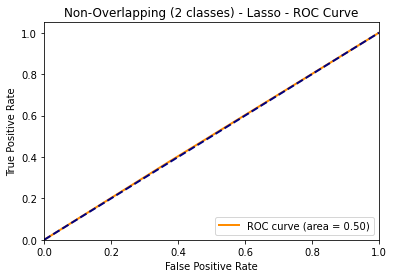

----- Non-Overlapping (2 classes) - RF -----
Non-Overlapping (2 classes) - RF - Random Forest:
  Accuracy: 0.9332
  Precision: 0.9355
  Recall: 0.9332
  F1-score: 0.9330



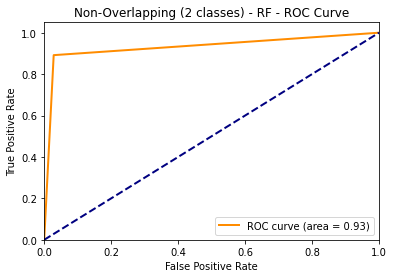

----- Sliding (2 classes) - Lasso -----
Sliding (2 classes) - Lasso - Lasso:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000



C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


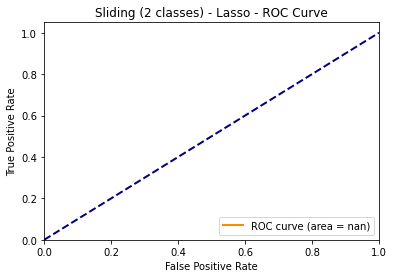

----- Sliding (2 classes) - RF -----


ValueError: Input y_true contains NaN.

In [66]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# --- Calculate built-in performance measures ---
def evaluate_performance(y_true, y_pred, dataset_name, model_name):
    """
    Calculates and prints various performance measures.
    """
    # Convert predictions to integers if they are not already
    y_pred = y_pred.astype(int)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)  # Handle zero division
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)  # Handle zero division
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)  # Handle zero division

    print(f'{dataset_name} - {model_name}:')
    print(f'  Accuracy: {accuracy:.4f}')
    print(f'  Precision: {precision:.4f}')
    print(f'  Recall: {recall:.4f}')
    print(f'  F1-score: {f1:.4f}\n')

    return accuracy, precision, recall, f1

# --- Evaluate performance for each dataset and model ---
results = {}
for dataset_name, df in datasets.items():
    y_true = df['label'].values
    y_pred = df['predicted_label'].values

    # Remove NaN values from y_true and y_pred
    nan_indices = np.isnan(y_pred)  # Find indices where y_pred has NaN values
    y_true = y_true[~nan_indices]  # Remove those indices from y_true
    y_pred = y_pred[~nan_indices]  # Remove those indices from y_pred

    print(f'----- {dataset_name} -----')
    model_name = 'Lasso' if 'Lasso' in dataset_name else 'Random Forest'
    results[dataset_name] = evaluate_performance(y_true, y_pred, dataset_name, model_name)

    # --- ROC Curve (only for 2-class datasets) ---
    if '2 classes' in dataset_name:
        # ROC
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{dataset_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

# --- Compare model performance ---
# ... (Analyze and compare the results in `results` dictionary)

In [67]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


# --- Calculate built-in performance measures ---
def evaluate_performance(y_true, y_pred, dataset_name, model_name):
    """
    Calculates and prints various performance measures.
    """
    # Convert predictions to integers if they are not already
    y_pred = y_pred.astype(int)

    # Remove NaN values from y_true and y_pred
    nan_indices = np.isnan(y_pred) | np.isnan(y_true)  # Find indices where either y_pred or y_true has NaN values
    y_true = y_true[~nan_indices]  # Remove those indices from y_true
    y_pred = y_pred[~nan_indices]  # Remove those indices from y_pred

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)  # Handle zero division
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)  # Handle zero division
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)  # Handle zero division

    print(f'{dataset_name} - {model_name}:')
    print(f'  Accuracy: {accuracy:.4f}')
    print(f'  Precision: {precision:.4f}')
    print(f'  Recall: {recall:.4f}')
    print(f'  F1-score: {f1:.4f}\n')

    return accuracy, precision, recall, f1

# --- Evaluate performance for each dataset and model ---
results = {}
for dataset_name, df in datasets.items():
    y_true = df['label'].values
    y_pred = df['predicted_label'].values

    print(f'----- {dataset_name} -----')
    model_name = 'Lasso' if 'Lasso' in dataset_name else 'Random Forest'
    results[dataset_name] = evaluate_performance(y_true, y_pred, dataset_name, model_name)


----- Non-Overlapping (2 classes) - Lasso -----
Non-Overlapping (2 classes) - Lasso - Lasso:
  Accuracy: 0.1013
  Precision: 0.5028
  Recall: 0.1013
  F1-score: 0.1675

----- Non-Overlapping (2 classes) - RF -----
Non-Overlapping (2 classes) - RF - Random Forest:
  Accuracy: 0.1866
  Precision: 0.9355
  Recall: 0.1866
  F1-score: 0.3109

----- Sliding (2 classes) - Lasso -----
Sliding (2 classes) - Lasso - Lasso:
  Accuracy: 0.2003
  Precision: 0.3061
  Recall: 0.2003
  F1-score: 0.2421

----- Sliding (2 classes) - RF -----
Sliding (2 classes) - RF - Random Forest:
  Accuracy: 0.0702
  Precision: 0.0996
  Recall: 0.0702
  F1-score: 0.0823

----- Non-Overlapping (3 classes) - Lasso -----
Non-Overlapping (3 classes) - Lasso - Lasso:
  Accuracy: 0.0601
  Precision: 0.0915
  Recall: 0.0601
  F1-score: 0.0726

----- Non-Overlapping (3 classes) - RF -----
Non-Overlapping (3 classes) - RF - Random Forest:
  Accuracy: 0.1822
  Precision: 0.9149
  Recall: 0.1822
  F1-score: 0.3033

----- Slidin

Shape of y_true: (104594,)
Shape of y_pred: (104594,)


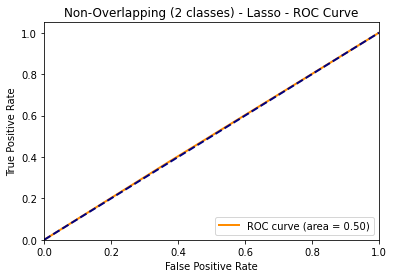

Shape of y_true: (104594,)
Shape of y_pred: (104594,)


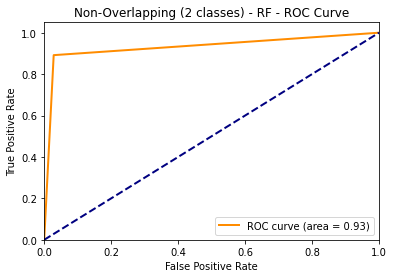

Shape of y_true: (784,)
Shape of y_pred: (784,)


C:\Users\Pradeep Nadella\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


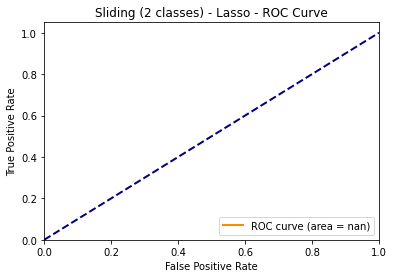

Shape of y_true: (36235,)
Shape of y_pred: (36235,)


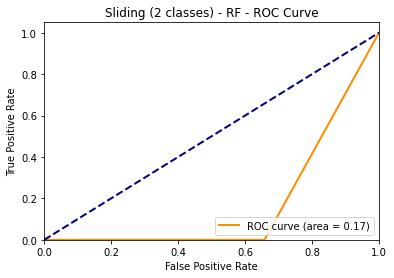

Shape of y_true: (178099,)
Shape of y_pred: (178099,)
Shape of y_true: (178099,)
Shape of y_pred: (178099,)
Shape of y_true: (178099,)
Shape of y_pred: (178099,)
Shape of y_true: (178099,)
Shape of y_pred: (178099,)


In [72]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

results = {}
for dataset_name, df in datasets.items():
    y_true = df['label'].values
    y_pred = df['predicted_label'].values

    print(f'Shape of y_true: {y_true.shape}')  # Print the shape of y_true
    print(f'Shape of y_pred: {y_pred.shape}')  # Print the shape of y_pred


    # --- ROC Curve (only for 2-class datasets) ---
    if '2 classes' in dataset_name:
        # Ensure y_true is in binary format (0 and 1)
        y_true_binary = (y_true == 1).astype(int)

        # Remove NaN values from y_true_binary and y_pred
        nan_indices = np.isnan(y_pred) | np.isnan(y_true_binary)
        y_true_binary = y_true_binary[~nan_indices]
        y_pred = y_pred[~nan_indices]

        # ROC
        fpr, tpr, _ = roc_curve(y_true_binary, y_pred)  # Use y_true_binary here
        roc_auc = auc(fpr, tpr)



        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{dataset_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

### Assignment 3

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# --- 1. Load the datasets ---
image_folder = r'C:\Users\Pradeep Nadella\Desktop\UNCG assignments\Semister 2\Big data and machine learning\Assignment 1'

df_non_overlapping_2 = pd.read_csv(f'{image_folder}\image01.csv')
df_sliding_2 = pd.read_csv(f'{image_folder}\herb_feature_vectors1.csv')  # Using herb_feature_vectors1.csv for sliding 2 classes
df_non_overlapping_3 = pd.read_csv(f'{image_folder}\image012.csv')
df_sliding_3 = pd.read_csv(f'{image_folder}\herb_sliding_block_feature_vectors1.csv')


In [6]:
# --- 2. Divide the data domain into 80:20 (training:testing) ---
def split_data(df):
    X = df.drop('label', axis=1)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test  # All these variables should be at the same indentation level

datasets = {
    'Non-Overlapping (2 classes)': split_data(df_non_overlapping_2),
    'Sliding (2 classes)': split_data(df_sliding_2),
    'Non-Overlapping (3 classes)': split_data(df_non_overlapping_3),
    'Sliding (3 classes)': split_data(df_sliding_3)
}

In [7]:
# --- 3. Apply PCA to the datasets ---
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    # Standardize the data before applying PCA
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Apply PCA with 95% variance retention
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Update the datasets dictionary with the PCA-transformed data
    datasets[dataset_name] = (X_train_pca, X_test_pca, y_train, y_test)